# How emission of greenhouse gases can affect temperature - EDA

In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I created a path to keep things tidy as possible so for reading dataset, first I need to change my directory to main

In [5]:
cd ..

E:\AI_Program\Course10_project


In [3]:
cd Course10_project

[WinError 2] The system cannot find the file specified: 'Course10_project'
E:\AI_Program\Course10_project\notebooks


In [6]:
# temp datasets of cities
temp_df_Bregenz = pd.read_csv('./data/temp/Bregenz 2010-01-01 to 2023-02-28.csv')
temp_df_Romanshorn = pd.read_csv('./data/temp/Romanshorn 2010-01-01 to 2023-02-28.csv')
temp_df_Friedrichshafen = pd.read_csv('./data/temp/Friedrichshafen 2010-01-01 to 2023-02-28.csv')
temp_df_konstanz = pd.read_csv('./data/temp/konstanz 2010-01-01 to 2023-02-28.csv')
temp_df_Lindau = pd.read_csv('./data/temp/Lindau 2010-01-01 to 2023-02-28.csv')
tmp_df_Kreuzlingen = pd.read_csv('./data/temp/Kreuzlingen 2010-01-01 to 2023-02-28.csv')
#temp_df_Radolfzell = pd.read_csv('./data/temp/Radolfzell 2010-01-01 to 2023-02-28.csv')
temp_df_Arbon = pd.read_csv('./data/temp/Arbon 2010-01-01 to 2023-02-28.csv')
tmp_df_Überlingen = pd.read_csv('./data/temp/Überlingen 2010-01-01 to 2023-02-28.csv')

In [7]:
# greenhouse gases emission daily basis from Pt. Barrow, Alaska site
N2O_daily = pd.read_csv('./data/daily_emission/brw_N2O_Day.csv',
                           sep='\s+',
                           names=['year','month','day','median','value_std_dev','SamplesNo'],
                           skiprows=39
                          )
SF6_daily = pd.read_csv('./data/daily_emission/brw_SF6_Day.csv',
                           sep='\s+',
                           names=['year','month','day','median','value_std_dev','SamplesNo'],
                           skiprows=39
                          )
C2O_daily = pd.read_excel('./data/daily_emission/CO2_daily.xlsx',
                           names=['year','month','day','median','value_std_dev','SamplesNo'],
                           skiprows=1
                          )
CH4_daily = pd.read_excel('./data/daily_emission/CH4_daily.xlsx',
                           names=['year','month','day','median','value_std_dev','SamplesNo'],
                           skiprows=1
                          )

In [8]:
# water level
constance_lake = pd.read_csv('./data/water_level/constance_water_level_altimetry.csv')
Rhine_river = pd.read_csv('./data/water_level/Rhine_water_level_altimetry.csv')

In [9]:
emission_datasets = [N2O_daily,SF6_daily,C2O_daily,CH4_daily]
temp_datasets = [temp_df_Bregenz, temp_df_Romanshorn, temp_df_Friedrichshafen, 
                 temp_df_konstanz, temp_df_Lindau, tmp_df_Kreuzlingen, temp_df_Arbon, 
                 tmp_df_Überlingen]
waterlevel_datasets = [constance_lake, Rhine_river]

First look without any changes

In [10]:
def EDA_FS_01(dataset):
    display(dataset.head(5))
    display(dataset.info())
    display(dataset.describe())
    display(dataset.isnull().sum())
    print('#####################################################')
    

In [11]:
# emission datasets
for df in emission_datasets:
    EDA_FS_01(df)

,year,month,day,median,value_std_dev,SamplesNo
0,1998,6,16,313.50,1.60,12
1,1998,6,17,314.15,1.52,21
2,1998,6,18,313.90,1.39,24
3,1998,6,19,314.13,1.31,18
4,1998,6,20,314.44,1.23,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8992 entries, 0 to 8991
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8992 non-null   int64  
 1   month          8992 non-null   int64  
 2   day            8992 non-null   int64  
 3   median         7934 non-null   float64
 4   value_std_dev  7934 non-null   float64
 5   SamplesNo      8992 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 421.6 KB


None

,year,month,day,median,value_std_dev,SamplesNo
count,8992.000000,8992.000000,8992.000000,7934.000000,7934.000000,8992.000000
mean,2010.263123,6.566170,15.738657,324.849845,0.535808,18.975311
std,7.112905,3.453693,8.798627,6.407311,0.431983,7.713797
min,1998.000000,1.000000,1.000000,312.680000,0.130000,0.000000
25%,2004.000000,4.000000,8.000000,319.370000,0.290000,18.000000
50%,2010.000000,7.000000,16.000000,324.450000,0.400000,23.000000
75%,2016.000000,10.000000,23.000000,330.187500,0.607500,24.000000
max,2023.000000,12.000000,31.000000,338.070000,3.880000,32.000000


year                0
month               0
day                 0
median           1058
value_std_dev    1058
SamplesNo           0
dtype: int64

#####################################################


,year,month,day,median,value_std_dev,SamplesNo
0,1998,6,16,4.382,0.018,15
1,1998,6,17,4.369,0.017,19
2,1998,6,18,4.353,0.017,24
3,1998,6,19,4.369,0.018,24
4,1998,6,20,4.350,0.018,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8992 entries, 0 to 8991
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8992 non-null   int64  
 1   month          8992 non-null   int64  
 2   day            8992 non-null   int64  
 3   median         8242 non-null   float64
 4   value_std_dev  8242 non-null   float64
 5   SamplesNo      8992 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 421.6 KB


None

,year,month,day,median,value_std_dev,SamplesNo
count,8992.000000,8992.000000,8992.000000,8242.000000,8242.000000,8992.000000
mean,2010.263123,6.566170,15.738657,7.575368,0.017152,20.610765
std,7.112905,3.453693,8.798627,2.061394,0.012184,6.990450
min,1998.000000,1.000000,1.000000,4.314000,0.005000,0.000000
25%,2004.000000,4.000000,8.000000,5.808000,0.009000,21.000000
50%,2010.000000,7.000000,16.000000,7.423000,0.014000,24.000000
75%,2016.000000,10.000000,23.000000,9.370000,0.018000,24.000000
max,2023.000000,12.000000,31.000000,11.482000,0.121000,25.000000


year               0
month              0
day                0
median           750
value_std_dev    750
SamplesNo          0
dtype: int64

#####################################################


,year,month,day,median,value_std_dev,SamplesNo
0,1973,1,2,-999.99,-99.99,0
1,1973,1,3,-999.99,-99.99,0
2,1973,1,4,-999.99,-99.99,0
3,1973,1,5,-999.99,-99.99,0
4,1973,1,6,-999.99,-99.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17896 entries, 0 to 17895
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           17896 non-null  int64  
 1   month          17896 non-null  int64  
 2   day            17896 non-null  int64  
 3   median         17896 non-null  float64
 4   value_std_dev  17896 non-null  float64
 5   SamplesNo      17896 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 839.0 KB


None

,year,month,day,median,value_std_dev,SamplesNo
count,17896.000000,17896.000000,17896.000000,17896.000000,17896.000000,17896.000000
mean,1997.002012,6.523301,15.730275,211.548393,-11.313363,14.462506
std,14.141590,3.448631,8.799817,439.201587,32.099357,8.107799
min,1973.000000,1.000000,1.000000,-999.990000,-99.990000,0.000000
25%,1985.000000,4.000000,8.000000,341.357500,0.100000,8.000000
50%,1997.000000,7.000000,16.000000,362.270000,0.180000,16.000000
75%,2009.000000,10.000000,23.000000,387.732500,0.330000,22.000000
max,2021.000000,12.000000,31.000000,427.810000,6.170000,24.000000


year             0
month            0
day              0
median           0
value_std_dev    0
SamplesNo        0
dtype: int64

#####################################################


,year,month,day,median,value_std_dev,SamplesNo
0,1986,1,2,-999.99,-99.99,0
1,1986,1,3,-999.99,-99.99,0
2,1986,1,4,-999.99,-99.99,0
3,1986,1,5,-999.99,-99.99,0
4,1986,1,6,-999.99,-99.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13148 entries, 0 to 13147
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           13148 non-null  int64  
 1   month          13148 non-null  int64  
 2   day            13148 non-null  int64  
 3   median         13148 non-null  float64
 4   value_std_dev  13148 non-null  float64
 5   SamplesNo      13148 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 616.4 KB


None

,year,month,day,median,value_std_dev,SamplesNo
count,13148.000000,13148.000000,13148.000000,13148.000000,13148.000000,13148.000000
mean,2003.501673,6.523350,15.730758,883.817084,-30.811491,10.347429
std,10.387931,3.448629,8.799824,1365.695077,50.625075,10.055119
min,1986.000000,1.000000,1.000000,-999.990000,-99.990000,0.000000
25%,1995.000000,4.000000,8.000000,-999.990000,-99.990000,0.000000
50%,2004.000000,7.000000,16.000000,1833.905000,1.210000,7.000000
75%,2012.250000,10.000000,23.000000,1881.070000,4.102500,22.000000
max,2021.000000,12.000000,31.000000,2239.260000,142.270000,24.000000


year             0
month            0
day              0
median           0
value_std_dev    0
SamplesNo        0
dtype: int64

#####################################################


In [12]:
# temp datasets
for df in temp_datasets:
    EDA_FS_01(df)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Bregenz,2010-01-01,3.7,-2.3,1.1,3.7,-8.4,-0.7,0.2,93.5,...,3.8,2,NaN,2010-01-01T08:08:58,2010-01-01T16:40:19,0.52,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"06680099999,11302099999,11308099999,1110509999..."
1,Bregenz,2010-01-02,1.0,-8.4,-4.3,-1.2,-13.4,-8.2,-7.5,79.1,...,4.1,2,NaN,2010-01-02T08:08:56,2010-01-02T16:41:17,0.56,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,snow,"06680099999,11302099999,11308099999,1110509999..."
2,Bregenz,2010-01-03,0.1,-9.9,-6.4,0.1,-16.0,-9.3,-11.9,66.3,...,7.1,4,NaN,2010-01-03T08:08:52,2010-01-03T16:42:18,0.59,Partially cloudy,Partly cloudy throughout the day.,snow,"06680099999,11302099999,11308099999,1110509999..."
3,Bregenz,2010-01-04,-2.6,-9.3,-7.5,-2.6,-14.2,-9.9,-10.3,81.3,...,5.8,3,NaN,2010-01-04T08:08:45,2010-01-04T16:43:20,0.63,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"06680099999,11302099999,11308099999,1110509999..."
4,Bregenz,2010-01-05,-2.6,-8.1,-6.4,-4.1,-14.0,-9.0,-8.0,88.9,...,6.6,4,NaN,2010-01-05T08:08:35,2010-01-05T16:44:25,0.66,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"06680099999,11302099999,11308099999,1110509999..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807 entries, 0 to 4806
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4807 non-null   object 
 1   datetime          4807 non-null   object 
 2   tempmax           4807 non-null   float64
 3   tempmin           4807 non-null   float64
 4   temp              4807 non-null   float64
 5   feelslikemax      4807 non-null   float64
 6   feelslikemin      4807 non-null   float64
 7   feelslike         4807 non-null   float64
 8   dew               4807 non-null   float64
 9   humidity          4807 non-null   float64
 10  precip            4807 non-null   float64
 11  precipprob        4807 non-null   int64  
 12  precipcover       4807 non-null   float64
 13  preciptype        2871 non-null   object 
 14  snow              4807 non-null   float64
 15  snowdepth         4807 non-null   float64
 16  windgust          4532 non-null   float64


None

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,...,4807.000000,4807.000000,4807.000000,4807.000000,4613.000000,4807.000000,4807.000000,4807.000000,415.000000,4807.000000
mean,14.704369,5.876451,9.921053,14.542397,4.342397,9.183566,5.630040,77.000853,4.944711,58.914084,...,15.824090,188.614375,1017.768483,61.872602,19.027921,171.832702,14.832120,5.816310,12.096386,0.482748
std,8.658389,6.907976,7.510353,8.861780,8.245998,8.243440,6.562663,11.475131,11.353236,49.204093,...,6.392421,93.001924,8.071569,25.282116,8.630472,92.565806,7.994014,2.338624,7.936363,0.288803
min,-8.200000,-17.000000,-12.700000,-9.600000,-26.300000,-19.100000,-17.400000,32.900000,0.000000,0.000000,...,3.600000,0.200000,982.100000,0.000000,0.000000,2.200000,0.000000,0.000000,10.000000,0.000000
25%,7.800000,0.600000,3.900000,7.100000,-1.900000,2.500000,0.500000,69.300000,0.000000,0.000000,...,10.800000,128.900000,1013.100000,44.600000,12.400000,89.850000,7.750000,4.000000,10.000000,0.250000
50%,14.800000,5.900000,9.900000,14.800000,4.400000,9.400000,5.600000,78.400000,0.079000,100.000000,...,14.300000,188.800000,1017.600000,66.800000,19.700000,161.700000,14.000000,6.000000,10.000000,0.500000
75%,21.600000,11.400000,15.900000,21.600000,11.400000,15.900000,11.200000,86.100000,4.696000,100.000000,...,19.600000,253.000000,1022.500000,82.600000,25.500000,244.600000,21.100000,8.000000,10.000000,0.750000
max,36.800000,24.800000,28.100000,37.700000,24.800000,28.400000,19.100000,99.100000,207.267000,100.000000,...,48.200000,360.000000,1045.200000,100.000000,70.000000,387.500000,33.500000,10.000000,60.000000,0.980000


name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1936
snow                   0
snowdepth              0
windgust             275
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility           194
solarradiation         0
solarenergy            0
uvindex                0
severerisk          4392
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               2
dtype: int64

#####################################################


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Romanshorn,2010-01-01,3.5,0.1,2.6,3.5,-4.6,1.6,2.3,97.6,...,2.6,1,NaN,2010-01-01T08:10:40,2010-01-01T16:41:32,0.52,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"06680099999,11302099999,06621099999,06681099999"
1,Romanshorn,2010-01-02,0.0,-5.3,-2.7,-5.2,-8.9,-7.1,-5.5,81.2,...,3.5,2,NaN,2010-01-02T08:10:39,2010-01-02T16:42:30,0.56,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,snow,"06680099999,11302099999,06621099999,06681099999"
2,Romanshorn,2010-01-03,-1.8,-7.7,-5.6,-1.8,-12.3,-8.5,-10.0,71.7,...,7.0,4,NaN,2010-01-03T08:10:35,2010-01-03T16:43:31,0.59,Partially cloudy,Partly cloudy throughout the day.,snow,"06680099999,11302099999,06621099999,06681099999"
3,Romanshorn,2010-01-04,-3.9,-8.1,-6.4,-3.9,-12.1,-8.1,-8.5,85.4,...,6.1,4,NaN,2010-01-04T08:10:28,2010-01-04T16:44:33,0.63,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"06680099999,11302099999,06621099999,06681099999"
4,Romanshorn,2010-01-05,-4.7,-7.8,-5.8,-4.7,-11.0,-7.8,-7.4,88.4,...,6.6,4,NaN,2010-01-05T08:10:18,2010-01-05T16:45:38,0.66,Partially cloudy,Partly cloudy throughout the day.,snow,"06680099999,11302099999,06621099999,06681099999"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807 entries, 0 to 4806
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4807 non-null   object 
 1   datetime          4807 non-null   object 
 2   tempmax           4807 non-null   float64
 3   tempmin           4807 non-null   float64
 4   temp              4807 non-null   float64
 5   feelslikemax      4807 non-null   float64
 6   feelslikemin      4807 non-null   float64
 7   feelslike         4807 non-null   float64
 8   dew               4807 non-null   float64
 9   humidity          4807 non-null   float64
 10  precip            4807 non-null   float64
 11  precipprob        4807 non-null   int64  
 12  precipcover       4807 non-null   float64
 13  preciptype        3026 non-null   object 
 14  snow              4807 non-null   float64
 15  snowdepth         4807 non-null   float64
 16  windgust          4491 non-null   float64


None

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,...,4807.000000,4807.000000,4807.000000,4807.000000,4777.000000,4807.000000,4807.000000,4807.000000,415.000000,4807.000000
mean,13.707593,6.441044,9.847993,13.283004,5.137716,9.031537,6.131142,79.846224,2.890354,62.325775,...,13.359538,199.615269,1017.895694,57.136717,23.884090,145.811109,12.585771,5.417516,11.746988,0.482748
std,8.657876,6.528748,7.361008,9.181935,7.715994,8.224989,6.510146,11.251864,5.913195,48.461983,...,5.707894,104.284160,8.083857,28.124232,10.547561,89.852577,7.766132,2.591201,7.315927,0.288803
min,-10.600000,-14.300000,-12.300000,-18.200000,-21.800000,-19.400000,-17.100000,33.200000,0.000000,0.000000,...,3.900000,0.100000,981.800000,0.000000,0.000000,4.000000,0.300000,0.000000,10.000000,0.000000
25%,6.800000,1.200000,3.900000,5.500000,-1.000000,2.200000,1.000000,72.300000,0.000000,0.000000,...,9.000000,82.800000,1013.200000,36.950000,16.000000,71.400000,6.100000,3.000000,10.000000,0.250000
50%,13.900000,6.300000,9.900000,13.900000,5.200000,9.300000,6.100000,81.600000,0.142000,100.000000,...,12.100000,238.500000,1017.700000,62.000000,24.500000,133.600000,11.500000,6.000000,10.000000,0.500000
75%,20.500000,11.900000,15.700000,20.500000,11.900000,15.700000,11.600000,88.600000,3.151500,100.000000,...,16.300000,265.750000,1022.700000,80.400000,31.200000,209.800000,18.100000,8.000000,10.000000,0.750000
max,34.100000,24.200000,27.400000,35.700000,24.200000,28.000000,20.100000,99.200000,64.377000,100.000000,...,48.000000,359.700000,1045.300000,100.000000,50.000000,374.600000,32.300000,10.000000,75.000000,0.980000


name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1781
snow                   0
snowdepth              0
windgust             316
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility            30
solarradiation         0
solarenergy            0
uvindex                0
severerisk          4392
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

#####################################################


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Friedrichshafen,2010-01-01,3.8,0.5,3.0,3.8,-4.0,2.1,2.6,97.1,...,2.6,1,NaN,2010-01-01T08:10:38,2010-01-01T16:40:47,0.52,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"11302099999,11105099999,06621099999,06681099999"
1,Friedrichshafen,2010-01-02,0.5,-4.9,-2.1,-4.1,-8.3,-6.3,-5.1,80.2,...,3.5,2,NaN,2010-01-02T08:10:36,2010-01-02T16:41:46,0.56,"Snow, Partially cloudy",Partly cloudy throughout the day with morning ...,snow,"11302099999,11105099999,06621099999,06681099999"
2,Friedrichshafen,2010-01-03,-1.2,-7.3,-5.2,-1.2,-11.3,-7.2,-9.7,71.2,...,7.0,4,NaN,2010-01-03T08:10:32,2010-01-03T16:42:46,0.59,Partially cloudy,Partly cloudy throughout the day.,snow,"11302099999,11105099999,06621099999,06681099999"
3,Friedrichshafen,2010-01-04,-3.5,-8.0,-6.3,-3.5,-11.0,-7.3,-8.3,85.5,...,6.1,4,NaN,2010-01-04T08:10:25,2010-01-04T16:43:49,0.63,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"11302099999,11105099999,06621099999,06681099999"
4,Friedrichshafen,2010-01-05,-4.4,-7.7,-5.7,-4.4,-10.2,-7.0,-7.2,88.9,...,6.6,4,NaN,2010-01-05T08:10:15,2010-01-05T16:44:54,0.66,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"11302099999,11105099999,06621099999,06681099999"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807 entries, 0 to 4806
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4807 non-null   object 
 1   datetime          4807 non-null   object 
 2   tempmax           4807 non-null   float64
 3   tempmin           4807 non-null   float64
 4   temp              4807 non-null   float64
 5   feelslikemax      4807 non-null   float64
 6   feelslikemin      4807 non-null   float64
 7   feelslike         4807 non-null   float64
 8   dew               4807 non-null   float64
 9   humidity          4807 non-null   float64
 10  precip            4807 non-null   float64
 11  precipprob        4807 non-null   int64  
 12  precipcover       4807 non-null   float64
 13  preciptype        2890 non-null   object 
 14  snow              4807 non-null   float64
 15  snowdepth         4807 non-null   float64
 16  windgust          4277 non-null   float64


None

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,...,4807.000000,4807.000000,4807.000000,4807.000000,4642.000000,4807.000000,4807.000000,4807.000000,415.000000,4807.000000
mean,13.925692,6.541856,10.023903,13.513876,5.328396,9.260079,6.169253,79.193988,3.127630,59.725400,...,12.880071,207.879155,1017.872103,60.162076,21.933542,165.350697,14.274683,5.685875,12.891566,0.482748
std,8.662132,6.617402,7.406742,9.177673,7.734044,8.218271,6.498705,11.669279,6.440735,49.050149,...,5.562017,108.387697,8.086929,27.116576,9.916080,92.546178,7.994239,2.392668,9.438348,0.288803
min,-10.400000,-15.000000,-12.300000,-16.700000,-21.300000,-18.600000,-16.900000,33.500000,0.000000,0.000000,...,3.500000,0.000000,981.900000,0.000000,0.000000,1.800000,0.000000,0.000000,10.000000,0.000000
25%,6.900000,1.200000,4.000000,5.700000,-0.800000,2.400000,1.100000,71.500000,0.000000,0.000000,...,8.800000,122.250000,1013.200000,41.850000,14.400000,84.050000,7.300000,4.000000,10.000000,0.250000
50%,14.000000,6.500000,10.100000,14.000000,5.400000,9.600000,6.100000,80.900000,0.140000,100.000000,...,11.600000,240.300000,1017.700000,65.600000,23.000000,152.600000,13.100000,6.000000,10.000000,0.500000
75%,20.700000,12.100000,16.000000,20.700000,12.100000,16.000000,11.700000,88.200000,3.350500,100.000000,...,15.800000,283.450000,1022.700000,82.300000,29.400000,237.200000,20.500000,8.000000,10.000000,0.750000
max,34.700000,24.200000,27.600000,35.500000,24.200000,28.000000,19.500000,99.800000,66.622000,100.000000,...,49.000000,360.000000,1045.300000,100.000000,50.000000,381.300000,33.000000,10.000000,75.000000,0.980000


name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1917
snow                   0
snowdepth              0
windgust             530
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility           165
solarradiation         0
solarenergy            0
uvindex                0
severerisk          4392
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               2
dtype: int64

#####################################################


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,konstanz,2010-01-01,3.8,0.5,2.9,3.8,-4.1,1.9,2.7,98.1,...,2.6,1,NaN,2010-01-01T08:11:52,2010-01-01T16:41:56,0.52,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"06689099999,06679099999,06621099999,06681099999"
1,konstanz,2010-01-02,0.4,-5.2,-2.2,-4.6,-8.6,-6.5,-5.0,81.8,...,3.5,2,NaN,2010-01-02T08:11:51,2010-01-02T16:42:54,0.56,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,snow,"06689099999,06679099999,06621099999,06681099999"
2,konstanz,2010-01-03,-1.4,-7.5,-5.4,-1.4,-12.3,-7.7,-9.4,74.3,...,7.0,4,NaN,2010-01-03T08:11:46,2010-01-03T16:43:55,0.59,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"06689099999,06679099999,06621099999,06681099999"
3,konstanz,2010-01-04,-3.4,-8.3,-6.3,-3.4,-12.0,-7.7,-8.6,84.3,...,6.1,4,NaN,2010-01-04T08:11:39,2010-01-04T16:44:58,0.63,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"06689099999,06679099999,06621099999,06681099999"
4,konstanz,2010-01-05,-4.2,-7.9,-5.4,-4.3,-10.0,-6.9,-7.3,86.8,...,6.6,4,NaN,2010-01-05T08:11:29,2010-01-05T16:46:03,0.66,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"06689099999,06679099999,06621099999,06681099999"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807 entries, 0 to 4806
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4807 non-null   object 
 1   datetime          4807 non-null   object 
 2   tempmax           4807 non-null   float64
 3   tempmin           4807 non-null   float64
 4   temp              4807 non-null   float64
 5   feelslikemax      4807 non-null   float64
 6   feelslikemin      4807 non-null   float64
 7   feelslike         4807 non-null   float64
 8   dew               4807 non-null   float64
 9   humidity          4807 non-null   float64
 10  precip            4807 non-null   float64
 11  precipprob        4807 non-null   int64  
 12  precipcover       4807 non-null   float64
 13  preciptype        2880 non-null   object 
 14  snow              4807 non-null   float64
 15  snowdepth         4807 non-null   float64
 16  windgust          4486 non-null   float64


None

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,...,4807.000000,4807.000000,4807.000000,4807.000000,2154.000000,4807.000000,4807.000000,4807.000000,415.000000,4807.000000
mean,13.696963,6.371999,9.827876,13.191658,4.955003,8.911754,6.038922,79.727065,2.494282,59.558976,...,14.703911,193.402496,1017.871250,58.153256,20.095775,165.427294,14.282193,5.686707,12.554217,0.482748
std,8.771912,6.629639,7.445604,9.360468,7.876394,8.383028,6.472437,12.243895,5.426010,49.082860,...,6.821793,103.428964,8.084171,27.989116,12.093756,92.577038,7.998376,2.391472,8.582159,0.288803
min,-11.200000,-15.800000,-13.300000,-18.900000,-23.200000,-20.200000,-17.600000,33.400000,0.000000,0.000000,...,4.300000,0.000000,981.800000,0.000000,0.000000,2.500000,0.000000,0.000000,10.000000,0.000000
25%,6.600000,1.000000,3.700000,5.200000,-1.400000,1.900000,0.900000,71.600000,0.000000,0.000000,...,9.600000,68.600000,1013.200000,38.400000,9.900000,84.000000,7.300000,4.000000,10.000000,0.250000
50%,13.800000,6.400000,9.900000,13.800000,5.000000,9.300000,6.000000,81.700000,0.057000,100.000000,...,13.000000,239.400000,1017.700000,63.100000,20.000000,153.000000,13.200000,6.000000,10.000000,0.500000
75%,20.600000,11.900000,15.700000,20.600000,11.900000,15.700000,11.500000,89.400000,2.341000,100.000000,...,18.100000,264.200000,1022.700000,81.200000,29.200000,237.600000,20.500000,8.000000,10.000000,0.750000
max,36.400000,23.600000,28.200000,35.600000,23.600000,28.000000,19.600000,100.000000,60.385000,100.000000,...,51.700000,359.900000,1045.400000,100.000000,50.000000,381.300000,33.000000,10.000000,60.000000,0.980000


name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1927
snow                   0
snowdepth              0
windgust             321
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility          2653
solarradiation         0
solarenergy            0
uvindex                0
severerisk          4392
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               2
dtype: int64

#####################################################


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Lindau,2010-01-01,3.3,-1.8,1.4,3.3,-7.6,-0.2,0.5,94.0,...,2.6,1,NaN,2010-01-01T08:09:22,2010-01-01T16:40:22,0.52,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"06680099999,11302099999,11105099999,0662109999..."
1,Lindau,2010-01-02,0.4,-7.8,-4.2,-3.0,-12.5,-8.5,-7.3,79.5,...,3.5,2,NaN,2010-01-02T08:09:21,2010-01-02T16:41:21,0.56,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,snow,"06680099999,11302099999,11105099999,0662109999..."
2,Lindau,2010-01-03,-1.1,-9.5,-6.4,-1.1,-15.1,-9.4,-12.0,65.5,...,7.0,4,NaN,2010-01-03T08:09:17,2010-01-03T16:42:21,0.59,Partially cloudy,Partly cloudy throughout the day.,snow,"06680099999,11302099999,11105099999,0662109999..."
3,Lindau,2010-01-04,-3.5,-9.0,-7.4,-3.5,-13.5,-9.7,-10.1,81.7,...,6.1,4,NaN,2010-01-04T08:09:10,2010-01-04T16:43:24,0.63,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"06680099999,11302099999,11105099999,0662109999..."
4,Lindau,2010-01-05,-3.6,-8.0,-6.4,-4.6,-13.4,-9.0,-7.9,89.4,...,6.6,4,NaN,2010-01-05T08:09:00,2010-01-05T16:44:28,0.66,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"06680099999,11302099999,11105099999,0662109999..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807 entries, 0 to 4806
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4807 non-null   object 
 1   datetime          4807 non-null   object 
 2   tempmax           4807 non-null   float64
 3   tempmin           4807 non-null   float64
 4   temp              4807 non-null   float64
 5   feelslikemax      4807 non-null   float64
 6   feelslikemin      4807 non-null   float64
 7   feelslike         4807 non-null   float64
 8   dew               4807 non-null   float64
 9   humidity          4807 non-null   float64
 10  precip            4807 non-null   float64
 11  precipprob        4807 non-null   int64  
 12  precipcover       4807 non-null   float64
 13  preciptype        3035 non-null   object 
 14  snow              4807 non-null   float64
 15  snowdepth         4807 non-null   float64
 16  windgust          4453 non-null   float64


None

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,...,4807.000000,4807.00000,4807.000000,4807.000000,4504.000000,4807.000000,4807.000000,4807.000000,415.000000,4807.000000
mean,14.106303,5.904431,9.734783,13.840171,4.487081,8.971542,5.611171,77.669856,4.521124,62.554608,...,13.868796,202.84429,1017.783316,61.370127,19.137766,165.321261,14.272914,5.685667,12.096386,0.482748
std,8.586084,6.808005,7.465238,8.915963,8.051870,8.234598,6.579477,11.186918,9.623791,48.403194,...,5.641316,104.27405,8.075864,26.158349,8.682467,92.585488,7.997929,2.394336,7.936363,0.288803
min,-8.800000,-16.700000,-12.900000,-12.500000,-25.100000,-19.200000,-17.600000,35.100000,0.000000,0.000000,...,3.500000,0.00000,982.000000,0.000000,0.000000,2.200000,0.000000,0.000000,10.000000,0.000000
25%,7.200000,0.600000,3.700000,6.300000,-1.700000,2.200000,0.500000,70.100000,0.000000,0.000000,...,9.700000,120.25000,1013.100000,44.000000,12.500000,84.050000,7.300000,4.000000,10.000000,0.250000
50%,14.200000,5.900000,9.800000,14.200000,4.600000,9.300000,5.600000,79.000000,0.176000,100.000000,...,12.700000,219.70000,1017.600000,66.600000,19.700000,152.600000,13.100000,6.000000,10.000000,0.500000
75%,20.900000,11.400000,15.700000,20.900000,11.400000,15.700000,11.200000,86.400000,4.645000,100.000000,...,16.700000,295.70000,1022.600000,82.700000,25.700000,237.050000,20.500000,8.000000,10.000000,0.750000
max,35.100000,24.100000,27.400000,35.500000,24.100000,28.100000,19.200000,99.200000,136.161000,100.000000,...,49.600000,359.80000,1045.100000,100.000000,70.000000,381.300000,33.000000,10.000000,60.000000,0.980000


name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1772
snow                   0
snowdepth              0
windgust             354
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility           303
solarradiation         0
solarenergy            0
uvindex                0
severerisk          4392
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               2
dtype: int64

#####################################################


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Kreuzlingen,2010-01-01,3.9,0.5,2.9,3.9,-4.0,1.9,2.7,98.2,...,2.6,1,NaN,2010-01-01T08:11:49,2010-01-01T16:42:00,0.52,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"06689099999,06679099999,06621099999,06681099999"
1,Kreuzlingen,2010-01-02,0.4,-5.1,-2.2,-4.5,-8.6,-6.4,-4.9,81.8,...,3.5,2,NaN,2010-01-02T08:11:48,2010-01-02T16:42:59,0.56,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,snow,"06689099999,06679099999,06621099999,06681099999"
2,Kreuzlingen,2010-01-03,-1.4,-7.5,-5.4,-1.4,-12.2,-7.7,-9.3,74.6,...,7.0,4,NaN,2010-01-03T08:11:43,2010-01-03T16:44:00,0.59,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"06689099999,06679099999,06621099999,06681099999"
3,Kreuzlingen,2010-01-04,-3.4,-8.2,-6.3,-3.4,-12.0,-7.7,-8.5,84.6,...,6.1,4,NaN,2010-01-04T08:11:36,2010-01-04T16:45:02,0.63,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"06689099999,06679099999,06621099999,06681099999"
4,Kreuzlingen,2010-01-05,-4.2,-7.9,-5.4,-4.3,-10.1,-7.0,-7.3,86.8,...,6.6,4,NaN,2010-01-05T08:11:26,2010-01-05T16:46:07,0.66,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"06689099999,06679099999,06621099999,06681099999"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807 entries, 0 to 4806
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4807 non-null   object 
 1   datetime          4807 non-null   object 
 2   tempmax           4807 non-null   float64
 3   tempmin           4807 non-null   float64
 4   temp              4807 non-null   float64
 5   feelslikemax      4807 non-null   float64
 6   feelslikemin      4807 non-null   float64
 7   feelslike         4807 non-null   float64
 8   dew               4807 non-null   float64
 9   humidity          4807 non-null   float64
 10  precip            4807 non-null   float64
 11  precipprob        4807 non-null   int64  
 12  precipcover       4807 non-null   float64
 13  preciptype        2839 non-null   object 
 14  snow              4807 non-null   float64
 15  snowdepth         4807 non-null   float64
 16  windgust          4486 non-null   float64


None

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,...,4807.000000,4807.000000,4807.000000,4807.000000,3795.000000,4807.000000,4807.000000,4807.000000,415.000000,4807.000000
mean,14.103037,6.650156,10.125546,13.623757,5.265529,9.251758,6.058290,78.454525,2.427000,58.747660,...,14.690992,192.240129,1017.789911,55.843062,22.436364,146.083170,12.609861,5.424173,12.554217,0.482748
std,8.889131,6.615676,7.501077,9.434339,7.850433,8.403874,6.453569,12.312253,5.367325,49.233959,...,6.826890,105.807402,8.077998,28.496813,12.262251,90.045187,7.782503,2.602302,8.582159,0.288803
min,-11.100000,-15.600000,-13.100000,-18.800000,-23.100000,-20.100000,-17.500000,33.500000,0.000000,0.000000,...,4.000000,0.100000,981.600000,0.000000,0.000000,4.000000,0.300000,0.000000,10.000000,0.000000
25%,7.000000,1.300000,4.000000,5.400000,-1.100000,2.200000,1.000000,69.900000,0.000000,0.000000,...,9.400000,65.250000,1013.100000,34.900000,12.300000,71.450000,6.100000,3.000000,10.000000,0.250000
50%,14.200000,6.600000,10.100000,14.200000,5.300000,9.700000,6.100000,80.300000,0.042000,100.000000,...,13.000000,240.200000,1017.600000,60.100000,23.000000,133.800000,11.600000,6.000000,10.000000,0.500000
75%,21.000000,12.200000,16.100000,21.000000,12.200000,16.100000,11.500000,88.100000,2.295000,100.000000,...,18.250000,267.850000,1022.600000,79.800000,31.800000,211.050000,18.200000,8.000000,10.000000,0.750000
max,35.900000,24.300000,28.000000,36.700000,24.300000,28.800000,19.900000,100.000000,61.755000,100.000000,...,51.300000,359.700000,1045.100000,100.000000,50.000000,374.600000,32.300000,10.000000,60.000000,0.980000


name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1968
snow                   0
snowdepth              0
windgust             321
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility          1012
solarradiation         0
solarenergy            0
uvindex                0
severerisk          4392
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

#####################################################


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Arbon,2010-01-01,3.3,-0.7,2.0,3.3,-5.7,1.0,1.2,93.9,...,2.6,1,NaN,2010-01-01T08:10:15,2010-01-01T16:41:30,0.52,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"06680099999,11302099999,11105099999,0662109999..."
1,Arbon,2010-01-02,-0.9,-6.6,-4.1,-6.1,-10.5,-8.5,-7.0,79.9,...,3.5,2,NaN,2010-01-02T08:10:13,2010-01-02T16:42:28,0.56,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,snow,"06680099999,11302099999,11105099999,0662109999..."
2,Arbon,2010-01-03,-3.4,-8.5,-6.5,-3.4,-13.2,-9.5,-12.7,61.6,...,7.0,4,NaN,2010-01-03T08:10:09,2010-01-03T16:43:29,0.59,Partially cloudy,Partly cloudy throughout the day.,snow,"06680099999,11302099999,11105099999,0662109999..."
3,Arbon,2010-01-04,-5.2,-8.5,-7.3,-5.2,-11.2,-8.0,-10.1,81.0,...,6.1,4,NaN,2010-01-04T08:10:02,2010-01-04T16:44:31,0.63,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"06680099999,11302099999,11105099999,0662109999..."
4,Arbon,2010-01-05,-5.7,-7.7,-6.7,-5.9,-11.4,-8.7,-7.8,92.3,...,6.6,4,NaN,2010-01-05T08:09:52,2010-01-05T16:45:36,0.66,Partially cloudy,Partly cloudy throughout the day.,snow,"06680099999,11302099999,11105099999,0662109999..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807 entries, 0 to 4806
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4807 non-null   object 
 1   datetime          4807 non-null   object 
 2   tempmax           4807 non-null   float64
 3   tempmin           4807 non-null   float64
 4   temp              4807 non-null   float64
 5   feelslikemax      4807 non-null   float64
 6   feelslikemin      4807 non-null   float64
 7   feelslike         4807 non-null   float64
 8   dew               4807 non-null   float64
 9   humidity          4807 non-null   float64
 10  precip            4807 non-null   float64
 11  precipprob        4807 non-null   int64  
 12  precipcover       4807 non-null   float64
 13  preciptype        3041 non-null   object 
 14  snow              4807 non-null   float64
 15  snowdepth         4807 non-null   float64
 16  windgust          4528 non-null   float64


None

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,...,4807.000000,4807.000000,4807.000000,4807.000000,4472.000000,4807.000000,4807.000000,4807.000000,415.000000,4807.000000
mean,13.112357,6.319784,9.518723,12.683004,5.058914,8.725005,5.428687,77.693239,3.521559,62.721032,...,13.483982,195.867006,1017.878406,60.974932,18.595081,147.346724,12.715602,5.379447,11.746988,0.482748
std,8.495223,6.682300,7.393597,8.999961,7.818770,8.199316,6.543822,11.631842,7.085618,48.359713,...,5.910291,104.357621,8.086735,26.271432,8.701243,92.100917,7.961329,2.602133,7.315927,0.288803
min,-11.500000,-16.600000,-13.800000,-17.300000,-22.300000,-19.500000,-18.300000,29.200000,0.000000,0.000000,...,3.000000,0.100000,981.900000,0.000000,0.000000,3.800000,0.000000,0.000000,10.000000,0.000000
25%,6.400000,1.000000,3.700000,5.100000,-1.100000,2.100000,0.400000,70.000000,0.000000,0.000000,...,9.100000,102.500000,1013.200000,43.300000,11.975000,69.850000,6.000000,3.000000,10.000000,0.250000
50%,13.300000,6.200000,9.600000,13.300000,5.100000,9.100000,5.400000,79.200000,0.212000,100.000000,...,12.100000,226.300000,1017.700000,65.900000,18.800000,133.700000,11.600000,5.000000,10.000000,0.500000
75%,19.700000,11.800000,15.400000,19.700000,11.800000,15.400000,10.900000,86.700000,4.018500,100.000000,...,16.500000,263.750000,1022.700000,82.400000,24.500000,216.950000,18.750000,8.000000,10.000000,0.750000
max,33.300000,23.600000,26.900000,34.400000,23.600000,27.800000,19.900000,99.200000,75.977000,100.000000,...,47.700000,360.000000,1045.400000,100.000000,50.000000,374.600000,32.300000,10.000000,75.000000,0.980000


name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1766
snow                   0
snowdepth              0
windgust             279
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility           335
solarradiation         0
solarenergy            0
uvindex                0
severerisk          4392
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

#####################################################


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Überlingen,2010-01-01,4.0,0.7,2.9,4.0,-4.2,2.0,2.5,97.1,...,3.3,2,NaN,2010-01-01T08:12:22,2010-01-01T16:41:35,0.52,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,rain,"06679099999,06621099999,06681099999,06620099999"
1,Überlingen,2010-01-02,0.4,-5.5,-2.2,-4.6,-8.7,-6.4,-5.2,80.3,...,4.2,2,NaN,2010-01-02T08:12:20,2010-01-02T16:42:34,0.56,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"06679099999,06621099999,06681099999,06620099999"
2,Überlingen,2010-01-03,-1.4,-7.6,-5.5,-1.4,-12.0,-8.1,-9.4,75.1,...,6.2,3,NaN,2010-01-03T08:12:16,2010-01-03T16:43:35,0.59,Clear,Clear conditions throughout the day.,clear-day,"06679099999,06621099999,06681099999,06620099999"
3,Überlingen,2010-01-04,-4.0,-8.6,-6.9,-4.0,-11.7,-7.9,-8.8,86.7,...,6.7,4,NaN,2010-01-04T08:12:08,2010-01-04T16:44:38,0.63,Clear,Clear conditions throughout the day.,clear-day,"06679099999,06621099999,06681099999,06620099999"
4,Überlingen,2010-01-05,-4.6,-8.2,-5.8,-4.6,-10.7,-8.0,-7.6,87.5,...,6.1,3,NaN,2010-01-05T08:11:58,2010-01-05T16:45:43,0.66,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"06679099999,06621099999,06681099999,06620099999"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807 entries, 0 to 4806
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4807 non-null   object 
 1   datetime          4807 non-null   object 
 2   tempmax           4807 non-null   float64
 3   tempmin           4807 non-null   float64
 4   temp              4807 non-null   float64
 5   feelslikemax      4807 non-null   float64
 6   feelslikemin      4807 non-null   float64
 7   feelslike         4807 non-null   float64
 8   dew               4807 non-null   float64
 9   humidity          4807 non-null   float64
 10  precip            4807 non-null   float64
 11  precipprob        4807 non-null   float64
 12  precipcover       4807 non-null   float64
 13  preciptype        2836 non-null   object 
 14  snow              4807 non-null   float64
 15  snowdepth         4807 non-null   float64
 16  windgust          4000 non-null   float64


None

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,...,4807.000000,4807.000000,4807.000000,4807.000000,2504.000000,4807.000000,4807.000000,4807.000000,415.000000,4807.000000
mean,13.408758,6.332619,9.645163,12.824860,4.817683,8.631454,5.860890,79.691117,2.476157,58.665446,...,14.967922,188.069544,1017.886228,58.140795,17.743810,157.426399,13.586936,5.278136,12.554217,0.482748
std,8.729302,6.587257,7.448225,9.398125,7.881778,8.454439,6.432692,12.402976,5.239891,49.247533,...,7.048568,104.512929,8.080059,28.065280,12.245598,95.509775,8.253563,2.464358,8.582159,0.288803
min,-11.200000,-16.300000,-13.600000,-18.700000,-23.400000,-20.300000,-17.700000,34.100000,0.000000,0.000000,...,4.300000,0.100000,981.800000,0.000000,0.200000,2.500000,0.000000,0.000000,10.000000,0.000000
25%,6.300000,1.000000,3.600000,4.800000,-1.600000,1.500000,0.800000,71.300000,0.000000,0.000000,...,9.700000,62.050000,1013.200000,37.700000,7.300000,72.800000,6.200000,3.000000,10.000000,0.250000
50%,13.600000,6.300000,9.700000,13.600000,4.700000,9.000000,5.800000,81.900000,0.087000,100.000000,...,13.200000,238.300000,1017.700000,62.000000,14.300000,142.800000,12.300000,5.000000,10.000000,0.500000
75%,20.300000,11.800000,15.550000,20.300000,11.800000,15.500000,11.300000,89.400000,2.417500,100.000000,...,18.500000,260.800000,1022.700000,81.800000,27.725000,234.900000,20.200000,7.000000,10.000000,0.750000
max,34.900000,23.500000,27.200000,34.500000,23.500000,27.900000,19.100000,100.000000,54.962000,100.000000,...,54.300000,359.900000,1045.400000,100.000000,50.000000,370.700000,32.100000,10.000000,60.000000,0.980000


name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1971
snow                   0
snowdepth              0
windgust             807
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility          2303
solarradiation         0
solarenergy            0
uvindex                0
severerisk          4392
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               2
dtype: int64

#####################################################


In [13]:
# water level datasets
for df in waterlevel_datasets:
    EDA_FS_01(df)

,date,water level,error
0,7/28/2002,395.373,0.046
1,7/30/2002,395.442,0.052
2,9/1/2002,395.524,2.189
3,9/3/2002,395.517,0.092
4,10/8/2002,395.321,0.018


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         374 non-null    object 
 1   water level  374 non-null    float64
 2   error        374 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.9+ KB


None

,water level,error
count,374.000000,374.000000
mean,395.073930,0.061668
std,0.498681,0.259015
min,394.042000,0.000000
25%,394.725000,0.004000
50%,395.033000,0.010000
75%,395.381000,0.028750
max,396.764000,2.298000


date           0
water level    0
error          0
dtype: int64

#####################################################


,date,water level,error
0,2016-03-06,394.744,0.420
1,2016-05-26,395.254,0.062
2,2016-06-22,396.452,0.003
3,2016-07-19,395.918,1.629
4,2016-08-15,395.450,0.030


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         92 non-null     object 
 1   water level  92 non-null     float64
 2   error        92 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.3+ KB


None

,water level,error
count,92.000000,92.000000
mean,394.671054,0.125793
std,0.453742,0.186850
min,393.848000,0.001000
25%,394.344750,0.030750
50%,394.646500,0.082000
75%,394.882250,0.163750
max,396.452000,1.629000


date           0
water level    0
error          0
dtype: int64

#####################################################


Based on the exploring data I decided to follow some preprocessing part

In [14]:
def preprocess_temp(dataset):
    # set date time as index after changing its type to datatime
    dataset['datetime'] = pd.to_datetime(dataset['datetime'])
    dataset['sunrise'] = pd.to_datetime(dataset['sunrise'])
    dataset['sunset'] = pd.to_datetime(dataset['sunset'])
    dataset.set_index('datetime',inplace=True)
    # drop the feature of severerisk becuase it is more than 80% null in all temp data
    dataset.drop(columns={'severerisk'},axis=1,inplace=True)


In [15]:
def preprocess_emission(dataset):
    # Creating a Series of datetime objects
    datetime_series = pd.to_datetime(dataset[['year', 'month', 'day']].rename(
    columns={'year': 'year', 'month': 'month', 'day': 'day'}))

    # Assigning the datetime_series as a new column in the DataFrame
    dataset['datetime'] = datetime_series
    
    # make index of date
    dataset.set_index('datetime',inplace=True)
    
    #drop unnecessary columns
    dataset.drop(['year','month','day'],axis=1,inplace=True)
    
    
    # make invalid information to null values
    dataset['median'].replace(-999.99,np.nan,inplace=True)
    dataset['value_std_dev'].replace(-99.99,np.nan,inplace=True)
    dataset['SamplesNo'].replace(0,np.nan,inplace=True)


In [16]:
for df in emission_datasets:
    preprocess_emission(df)
    
for df in temp_datasets:
    preprocess_temp(df)

Now it is time to exploring the dataset again to see the affection of our changes

In [17]:
def EDA_FS_02(dataset):
    display(dataset.head(5))
    columns = list(dataset.columns)
    display(dataset.info())
    display(dataset.describe())
    display(dataset.isnull().sum())
    date_series = dataset.index.to_series()
    print(f'The min date of dataset: %s' %date_series[0])
    print(f'The max date of dataset: %s' %date_series[-1])
    print(f'The duration dataset: %s' %(date_series[-1] - date_series[0]))
    print(f'Length of dataset %s' %len(dataset.index))
    print('#####################################################')
    

In [18]:
for df in emission_datasets:
    EDA_FS_02(df)

,median,value_std_dev,SamplesNo
datetime,,,
1998-06-16,313.50,1.60,12.0
1998-06-17,314.15,1.52,21.0
1998-06-18,313.90,1.39,24.0
1998-06-19,314.13,1.31,18.0
1998-06-20,314.44,1.23,23.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8992 entries, 1998-06-16 to 2023-01-28
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median         7934 non-null   float64
 1   value_std_dev  7934 non-null   float64
 2   SamplesNo      7934 non-null   float64
dtypes: float64(3)
memory usage: 281.0 KB


None

,median,value_std_dev,SamplesNo
count,7934.000000,7934.000000,7934.000000
mean,324.849845,0.535808,21.505672
std,6.407311,0.431983,3.607548
min,312.680000,0.130000,5.000000
25%,319.370000,0.290000,20.000000
50%,324.450000,0.400000,23.000000
75%,330.187500,0.607500,24.000000
max,338.070000,3.880000,32.000000


median           1058
value_std_dev    1058
SamplesNo        1058
dtype: int64

The min date of dataset: 1998-06-16 00:00:00
The max date of dataset: 2023-01-28 00:00:00
The duration dataset: 8992 days 00:00:00
Length of dataset 8992
#####################################################


,median,value_std_dev,SamplesNo
datetime,,,
1998-06-16,4.382,0.018,15.0
1998-06-17,4.369,0.017,19.0
1998-06-18,4.353,0.017,24.0
1998-06-19,4.369,0.018,24.0
1998-06-20,4.350,0.018,23.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8992 entries, 1998-06-16 to 2023-01-28
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median         8242 non-null   float64
 1   value_std_dev  8242 non-null   float64
 2   SamplesNo      8242 non-null   float64
dtypes: float64(3)
memory usage: 281.0 KB


None

,median,value_std_dev,SamplesNo
count,8242.000000,8242.000000,8242.000000
mean,7.575368,0.017152,22.486290
std,2.061394,0.012184,3.336904
min,4.314000,0.005000,5.000000
25%,5.808000,0.009000,23.000000
50%,7.423000,0.014000,24.000000
75%,9.370000,0.018000,24.000000
max,11.482000,0.121000,25.000000


median           750
value_std_dev    750
SamplesNo        750
dtype: int64

The min date of dataset: 1998-06-16 00:00:00
The max date of dataset: 2023-01-28 00:00:00
The duration dataset: 8992 days 00:00:00
Length of dataset 8992
#####################################################


,median,value_std_dev,SamplesNo
datetime,,,
1973-01-02,NaN,NaN,NaN
1973-01-03,NaN,NaN,NaN
1973-01-04,NaN,NaN,NaN
1973-01-05,NaN,NaN,NaN
1973-01-06,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17896 entries, 1973-01-02 to 2021-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median         15823 non-null  float64
 1   value_std_dev  15823 non-null  float64
 2   SamplesNo      15823 non-null  float64
dtypes: float64(3)
memory usage: 559.2 KB


None

,median,value_std_dev,SamplesNo
count,15823.000000,15823.000000,15823.000000
mean,370.274241,0.304324,16.357265
std,25.718743,0.325534,6.584387
min,319.510000,0.000000,1.000000
25%,348.670000,0.130000,11.000000
50%,367.380000,0.210000,18.000000
75%,390.865000,0.360000,23.000000
max,427.810000,6.170000,24.000000


median           2073
value_std_dev    2073
SamplesNo        2073
dtype: int64

The min date of dataset: 1973-01-02 00:00:00
The max date of dataset: 2021-12-31 00:00:00
The duration dataset: 17895 days 00:00:00
Length of dataset 17896
#####################################################


,median,value_std_dev,SamplesNo
datetime,,,
1986-01-02,NaN,NaN,NaN
1986-01-03,NaN,NaN,NaN
1986-01-04,NaN,NaN,NaN
1986-01-05,NaN,NaN,NaN
1986-01-06,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13148 entries, 1986-01-02 to 2021-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median         8622 non-null   float64
 1   value_std_dev  8622 non-null   float64
 2   SamplesNo      8622 non-null   float64
dtypes: float64(3)
memory usage: 410.9 KB


None

,median,value_std_dev,SamplesNo
count,8622.000000,8622.000000,8622.00000
mean,1872.695634,5.502813,15.77917
std,56.925509,8.778951,8.27449
min,1726.550000,0.000000,1.00000
25%,1836.012500,1.270000,8.00000
50%,1865.560000,2.900000,19.00000
75%,1909.727500,6.120000,24.00000
max,2239.260000,142.270000,24.00000


median           4526
value_std_dev    4526
SamplesNo        4526
dtype: int64

The min date of dataset: 1986-01-02 00:00:00
The max date of dataset: 2021-12-31 00:00:00
The duration dataset: 13147 days 00:00:00
Length of dataset 13148
#####################################################


In [19]:
for df in temp_datasets:
    EDA_FS_02(df)

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01,Bregenz,3.7,-2.3,1.1,3.7,-8.4,-0.7,0.2,93.5,19.198,...,47.2,3.8,2,2010-01-01 08:08:58,2010-01-01 16:40:19,0.52,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"06680099999,11302099999,11308099999,1110509999..."
2010-01-02,Bregenz,1.0,-8.4,-4.3,-1.2,-13.4,-8.2,-7.5,79.1,2.496,...,46.4,4.1,2,2010-01-02 08:08:56,2010-01-02 16:41:17,0.56,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,snow,"06680099999,11302099999,11308099999,1110509999..."
2010-01-03,Bregenz,0.1,-9.9,-6.4,0.1,-16.0,-9.3,-11.9,66.3,0.000,...,82.4,7.1,4,2010-01-03 08:08:52,2010-01-03 16:42:18,0.59,Partially cloudy,Partly cloudy throughout the day.,snow,"06680099999,11302099999,11308099999,1110509999..."
2010-01-04,Bregenz,-2.6,-9.3,-7.5,-2.6,-14.2,-9.9,-10.3,81.3,0.000,...,67.2,5.8,3,2010-01-04 08:08:45,2010-01-04 16:43:20,0.63,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"06680099999,11302099999,11308099999,1110509999..."
2010-01-05,Bregenz,-2.6,-8.1,-6.4,-4.1,-14.0,-9.0,-8.0,88.9,0.000,...,76.3,6.6,4,2010-01-05 08:08:35,2010-01-05 16:44:25,0.66,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"06680099999,11302099999,11308099999,1110509999..."


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4807 entries, 2010-01-01 to 2023-02-28
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4807 non-null   object        
 1   tempmax           4807 non-null   float64       
 2   tempmin           4807 non-null   float64       
 3   temp              4807 non-null   float64       
 4   feelslikemax      4807 non-null   float64       
 5   feelslikemin      4807 non-null   float64       
 6   feelslike         4807 non-null   float64       
 7   dew               4807 non-null   float64       
 8   humidity          4807 non-null   float64       
 9   precip            4807 non-null   float64       
 10  precipprob        4807 non-null   int64         
 11  precipcover       4807 non-null   float64       
 12  preciptype        2871 non-null   object        
 13  snow              4807 non-null   float64       
 14  snowde

None

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
count,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,...,4532.000000,4807.000000,4807.000000,4807.000000,4807.000000,4613.000000,4807.000000,4807.000000,4807.000000,4807.000000
mean,14.704369,5.876451,9.921053,14.542397,4.342397,9.183566,5.630040,77.000853,4.944711,58.914084,...,36.056024,15.824090,188.614375,1017.768483,61.872602,19.027921,171.832702,14.832120,5.816310,0.482748
std,8.658389,6.907976,7.510353,8.861780,8.245998,8.243440,6.562663,11.475131,11.353236,49.204093,...,17.074424,6.392421,93.001924,8.071569,25.282116,8.630472,92.565806,7.994014,2.338624,0.288803
min,-8.200000,-17.000000,-12.700000,-9.600000,-26.300000,-19.100000,-17.400000,32.900000,0.000000,0.000000,...,5.400000,3.600000,0.200000,982.100000,0.000000,0.000000,2.200000,0.000000,0.000000,0.000000
25%,7.800000,0.600000,3.900000,7.100000,-1.900000,2.500000,0.500000,69.300000,0.000000,0.000000,...,22.300000,10.800000,128.900000,1013.100000,44.600000,12.400000,89.850000,7.750000,4.000000,0.250000
50%,14.800000,5.900000,9.900000,14.800000,4.400000,9.400000,5.600000,78.400000,0.079000,100.000000,...,31.700000,14.300000,188.800000,1017.600000,66.800000,19.700000,161.700000,14.000000,6.000000,0.500000
75%,21.600000,11.400000,15.900000,21.600000,11.400000,15.900000,11.200000,86.100000,4.696000,100.000000,...,47.025000,19.600000,253.000000,1022.500000,82.600000,25.500000,244.600000,21.100000,8.000000,0.750000
max,36.800000,24.800000,28.100000,37.700000,24.800000,28.400000,19.100000,99.100000,207.267000,100.000000,...,139.500000,48.200000,360.000000,1045.200000,100.000000,70.000000,387.500000,33.500000,10.000000,0.980000


name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1936
snow                   0
snowdepth              0
windgust             275
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility           194
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               2
dtype: int64

The min date of dataset: 2010-01-01 00:00:00
The max date of dataset: 2023-02-28 00:00:00
The duration dataset: 4806 days 00:00:00
Length of dataset 4807
#####################################################


,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01,Romanshorn,3.5,0.1,2.6,3.5,-4.6,1.6,2.3,97.6,13.994,...,29.3,2.6,1,2010-01-01 08:10:40,2010-01-01 16:41:32,0.52,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"06680099999,11302099999,06621099999,06681099999"
2010-01-02,Romanshorn,0.0,-5.3,-2.7,-5.2,-8.9,-7.1,-5.5,81.2,0.608,...,40.7,3.5,2,2010-01-02 08:10:39,2010-01-02 16:42:30,0.56,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,snow,"06680099999,11302099999,06621099999,06681099999"
2010-01-03,Romanshorn,-1.8,-7.7,-5.6,-1.8,-12.3,-8.5,-10.0,71.7,0.000,...,80.8,7.0,4,2010-01-03 08:10:35,2010-01-03 16:43:31,0.59,Partially cloudy,Partly cloudy throughout the day.,snow,"06680099999,11302099999,06621099999,06681099999"
2010-01-04,Romanshorn,-3.9,-8.1,-6.4,-3.9,-12.1,-8.1,-8.5,85.4,0.000,...,71.0,6.1,4,2010-01-04 08:10:28,2010-01-04 16:44:33,0.63,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"06680099999,11302099999,06621099999,06681099999"
2010-01-05,Romanshorn,-4.7,-7.8,-5.8,-4.7,-11.0,-7.8,-7.4,88.4,0.000,...,77.7,6.6,4,2010-01-05 08:10:18,2010-01-05 16:45:38,0.66,Partially cloudy,Partly cloudy throughout the day.,snow,"06680099999,11302099999,06621099999,06681099999"


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4807 entries, 2010-01-01 to 2023-02-28
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4807 non-null   object        
 1   tempmax           4807 non-null   float64       
 2   tempmin           4807 non-null   float64       
 3   temp              4807 non-null   float64       
 4   feelslikemax      4807 non-null   float64       
 5   feelslikemin      4807 non-null   float64       
 6   feelslike         4807 non-null   float64       
 7   dew               4807 non-null   float64       
 8   humidity          4807 non-null   float64       
 9   precip            4807 non-null   float64       
 10  precipprob        4807 non-null   int64         
 11  precipcover       4807 non-null   float64       
 12  preciptype        3026 non-null   object        
 13  snow              4807 non-null   float64       
 14  snowde

None

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
count,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,...,4491.000000,4807.000000,4807.000000,4807.000000,4807.000000,4777.000000,4807.000000,4807.000000,4807.000000,4807.000000
mean,13.707593,6.441044,9.847993,13.283004,5.137716,9.031537,6.131142,79.846224,2.890354,62.325775,...,30.540392,13.359538,199.615269,1017.895694,57.136717,23.884090,145.811109,12.585771,5.417516,0.482748
std,8.657876,6.528748,7.361008,9.181935,7.715994,8.224989,6.510146,11.251864,5.913195,48.461983,...,14.561257,5.707894,104.284160,8.083857,28.124232,10.547561,89.852577,7.766132,2.591201,0.288803
min,-10.600000,-14.300000,-12.300000,-18.200000,-21.800000,-19.400000,-17.100000,33.200000,0.000000,0.000000,...,5.400000,3.900000,0.100000,981.800000,0.000000,0.000000,4.000000,0.300000,0.000000,0.000000
25%,6.800000,1.200000,3.900000,5.500000,-1.000000,2.200000,1.000000,72.300000,0.000000,0.000000,...,19.600000,9.000000,82.800000,1013.200000,36.950000,16.000000,71.400000,6.100000,3.000000,0.250000
50%,13.900000,6.300000,9.900000,13.900000,5.200000,9.300000,6.100000,81.600000,0.142000,100.000000,...,27.400000,12.100000,238.500000,1017.700000,62.000000,24.500000,133.600000,11.500000,6.000000,0.500000
75%,20.500000,11.900000,15.700000,20.500000,11.900000,15.700000,11.600000,88.600000,3.151500,100.000000,...,38.400000,16.300000,265.750000,1022.700000,80.400000,31.200000,209.800000,18.100000,8.000000,0.750000
max,34.100000,24.200000,27.400000,35.700000,24.200000,28.000000,20.100000,99.200000,64.377000,100.000000,...,109.400000,48.000000,359.700000,1045.300000,100.000000,50.000000,374.600000,32.300000,10.000000,0.980000


name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1781
snow                   0
snowdepth              0
windgust             316
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility            30
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

The min date of dataset: 2010-01-01 00:00:00
The max date of dataset: 2023-02-28 00:00:00
The duration dataset: 4806 days 00:00:00
Length of dataset 4807
#####################################################


,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01,Friedrichshafen,3.8,0.5,3.0,3.8,-4.0,2.1,2.6,97.1,14.207,...,30.6,2.6,1,2010-01-01 08:10:38,2010-01-01 16:40:47,0.52,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"11302099999,11105099999,06621099999,06681099999"
2010-01-02,Friedrichshafen,0.5,-4.9,-2.1,-4.1,-8.3,-6.3,-5.1,80.2,0.084,...,40.7,3.5,2,2010-01-02 08:10:36,2010-01-02 16:41:46,0.56,"Snow, Partially cloudy",Partly cloudy throughout the day with morning ...,snow,"11302099999,11105099999,06621099999,06681099999"
2010-01-03,Friedrichshafen,-1.2,-7.3,-5.2,-1.2,-11.3,-7.2,-9.7,71.2,0.000,...,80.8,7.0,4,2010-01-03 08:10:32,2010-01-03 16:42:46,0.59,Partially cloudy,Partly cloudy throughout the day.,snow,"11302099999,11105099999,06621099999,06681099999"
2010-01-04,Friedrichshafen,-3.5,-8.0,-6.3,-3.5,-11.0,-7.3,-8.3,85.5,0.000,...,71.0,6.1,4,2010-01-04 08:10:25,2010-01-04 16:43:49,0.63,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"11302099999,11105099999,06621099999,06681099999"
2010-01-05,Friedrichshafen,-4.4,-7.7,-5.7,-4.4,-10.2,-7.0,-7.2,88.9,0.000,...,77.7,6.6,4,2010-01-05 08:10:15,2010-01-05 16:44:54,0.66,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"11302099999,11105099999,06621099999,06681099999"


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4807 entries, 2010-01-01 to 2023-02-28
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4807 non-null   object        
 1   tempmax           4807 non-null   float64       
 2   tempmin           4807 non-null   float64       
 3   temp              4807 non-null   float64       
 4   feelslikemax      4807 non-null   float64       
 5   feelslikemin      4807 non-null   float64       
 6   feelslike         4807 non-null   float64       
 7   dew               4807 non-null   float64       
 8   humidity          4807 non-null   float64       
 9   precip            4807 non-null   float64       
 10  precipprob        4807 non-null   int64         
 11  precipcover       4807 non-null   float64       
 12  preciptype        2890 non-null   object        
 13  snow              4807 non-null   float64       
 14  snowde

None

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
count,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,...,4277.000000,4807.000000,4807.000000,4807.000000,4807.000000,4642.000000,4807.000000,4807.000000,4807.000000,4807.000000
mean,13.925692,6.541856,10.023903,13.513876,5.328396,9.260079,6.169253,79.193988,3.127630,59.725400,...,29.450222,12.880071,207.879155,1017.872103,60.162076,21.933542,165.350697,14.274683,5.685875,0.482748
std,8.662132,6.617402,7.406742,9.177673,7.734044,8.218271,6.498705,11.669279,6.440735,49.050149,...,14.503548,5.562017,108.387697,8.086929,27.116576,9.916080,92.546178,7.994239,2.392668,0.288803
min,-10.400000,-15.000000,-12.300000,-16.700000,-21.300000,-18.600000,-16.900000,33.500000,0.000000,0.000000,...,3.600000,3.500000,0.000000,981.900000,0.000000,0.000000,1.800000,0.000000,0.000000,0.000000
25%,6.900000,1.200000,4.000000,5.700000,-0.800000,2.400000,1.100000,71.500000,0.000000,0.000000,...,18.500000,8.800000,122.250000,1013.200000,41.850000,14.400000,84.050000,7.300000,4.000000,0.250000
50%,14.000000,6.500000,10.100000,14.000000,5.400000,9.600000,6.100000,80.900000,0.140000,100.000000,...,26.100000,11.600000,240.300000,1017.700000,65.600000,23.000000,152.600000,13.100000,6.000000,0.500000
75%,20.700000,12.100000,16.000000,20.700000,12.100000,16.000000,11.700000,88.200000,3.350500,100.000000,...,37.500000,15.800000,283.450000,1022.700000,82.300000,29.400000,237.200000,20.500000,8.000000,0.750000
max,34.700000,24.200000,27.600000,35.500000,24.200000,28.000000,19.500000,99.800000,66.622000,100.000000,...,104.300000,49.000000,360.000000,1045.300000,100.000000,50.000000,381.300000,33.000000,10.000000,0.980000


name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1917
snow                   0
snowdepth              0
windgust             530
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility           165
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               2
dtype: int64

The min date of dataset: 2010-01-01 00:00:00
The max date of dataset: 2023-02-28 00:00:00
The duration dataset: 4806 days 00:00:00
Length of dataset 4807
#####################################################


,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01,konstanz,3.8,0.5,2.9,3.8,-4.1,1.9,2.7,98.1,13.582,...,30.6,2.6,1,2010-01-01 08:11:52,2010-01-01 16:41:56,0.52,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"06689099999,06679099999,06621099999,06681099999"
2010-01-02,konstanz,0.4,-5.2,-2.2,-4.6,-8.6,-6.5,-5.0,81.8,0.045,...,40.7,3.5,2,2010-01-02 08:11:51,2010-01-02 16:42:54,0.56,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,snow,"06689099999,06679099999,06621099999,06681099999"
2010-01-03,konstanz,-1.4,-7.5,-5.4,-1.4,-12.3,-7.7,-9.4,74.3,0.000,...,80.8,7.0,4,2010-01-03 08:11:46,2010-01-03 16:43:55,0.59,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"06689099999,06679099999,06621099999,06681099999"
2010-01-04,konstanz,-3.4,-8.3,-6.3,-3.4,-12.0,-7.7,-8.6,84.3,0.000,...,71.0,6.1,4,2010-01-04 08:11:39,2010-01-04 16:44:58,0.63,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"06689099999,06679099999,06621099999,06681099999"
2010-01-05,konstanz,-4.2,-7.9,-5.4,-4.3,-10.0,-6.9,-7.3,86.8,0.000,...,77.7,6.6,4,2010-01-05 08:11:29,2010-01-05 16:46:03,0.66,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"06689099999,06679099999,06621099999,06681099999"


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4807 entries, 2010-01-01 to 2023-02-28
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4807 non-null   object        
 1   tempmax           4807 non-null   float64       
 2   tempmin           4807 non-null   float64       
 3   temp              4807 non-null   float64       
 4   feelslikemax      4807 non-null   float64       
 5   feelslikemin      4807 non-null   float64       
 6   feelslike         4807 non-null   float64       
 7   dew               4807 non-null   float64       
 8   humidity          4807 non-null   float64       
 9   precip            4807 non-null   float64       
 10  precipprob        4807 non-null   int64         
 11  precipcover       4807 non-null   float64       
 12  preciptype        2880 non-null   object        
 13  snow              4807 non-null   float64       
 14  snowde

None

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
count,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,...,4486.000000,4807.000000,4807.000000,4807.000000,4807.000000,2154.000000,4807.000000,4807.000000,4807.000000,4807.000000
mean,13.696963,6.371999,9.827876,13.191658,4.955003,8.911754,6.038922,79.727065,2.494282,59.558976,...,30.252898,14.703911,193.402496,1017.871250,58.153256,20.095775,165.427294,14.282193,5.686707,0.482748
std,8.771912,6.629639,7.445604,9.360468,7.876394,8.383028,6.472437,12.243895,5.426010,49.082860,...,14.473135,6.821793,103.428964,8.084171,27.989116,12.093756,92.577038,7.998376,2.391472,0.288803
min,-11.200000,-15.800000,-13.300000,-18.900000,-23.200000,-20.200000,-17.600000,33.400000,0.000000,0.000000,...,5.400000,4.300000,0.000000,981.800000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000
25%,6.600000,1.000000,3.700000,5.200000,-1.400000,1.900000,0.900000,71.600000,0.000000,0.000000,...,19.600000,9.600000,68.600000,1013.200000,38.400000,9.900000,84.000000,7.300000,4.000000,0.250000
50%,13.800000,6.400000,9.900000,13.800000,5.000000,9.300000,6.000000,81.700000,0.057000,100.000000,...,26.800000,13.000000,239.400000,1017.700000,63.100000,20.000000,153.000000,13.200000,6.000000,0.500000
75%,20.600000,11.900000,15.700000,20.600000,11.900000,15.700000,11.500000,89.400000,2.341000,100.000000,...,37.900000,18.100000,264.200000,1022.700000,81.200000,29.200000,237.600000,20.500000,8.000000,0.750000
max,36.400000,23.600000,28.200000,35.600000,23.600000,28.000000,19.600000,100.000000,60.385000,100.000000,...,111.200000,51.700000,359.900000,1045.400000,100.000000,50.000000,381.300000,33.000000,10.000000,0.980000


name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1927
snow                   0
snowdepth              0
windgust             321
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility          2653
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               2
dtype: int64

The min date of dataset: 2010-01-01 00:00:00
The max date of dataset: 2023-02-28 00:00:00
The duration dataset: 4806 days 00:00:00
Length of dataset 4807
#####################################################


,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01,Lindau,3.3,-1.8,1.4,3.3,-7.6,-0.2,0.5,94.0,17.945,...,30.6,2.6,1,2010-01-01 08:09:22,2010-01-01 16:40:22,0.52,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"06680099999,11302099999,11105099999,0662109999..."
2010-01-02,Lindau,0.4,-7.8,-4.2,-3.0,-12.5,-8.5,-7.3,79.5,2.065,...,40.7,3.5,2,2010-01-02 08:09:21,2010-01-02 16:41:21,0.56,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,snow,"06680099999,11302099999,11105099999,0662109999..."
2010-01-03,Lindau,-1.1,-9.5,-6.4,-1.1,-15.1,-9.4,-12.0,65.5,0.000,...,80.8,7.0,4,2010-01-03 08:09:17,2010-01-03 16:42:21,0.59,Partially cloudy,Partly cloudy throughout the day.,snow,"06680099999,11302099999,11105099999,0662109999..."
2010-01-04,Lindau,-3.5,-9.0,-7.4,-3.5,-13.5,-9.7,-10.1,81.7,0.000,...,71.0,6.1,4,2010-01-04 08:09:10,2010-01-04 16:43:24,0.63,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"06680099999,11302099999,11105099999,0662109999..."
2010-01-05,Lindau,-3.6,-8.0,-6.4,-4.6,-13.4,-9.0,-7.9,89.4,0.000,...,77.7,6.6,4,2010-01-05 08:09:00,2010-01-05 16:44:28,0.66,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"06680099999,11302099999,11105099999,0662109999..."


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4807 entries, 2010-01-01 to 2023-02-28
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4807 non-null   object        
 1   tempmax           4807 non-null   float64       
 2   tempmin           4807 non-null   float64       
 3   temp              4807 non-null   float64       
 4   feelslikemax      4807 non-null   float64       
 5   feelslikemin      4807 non-null   float64       
 6   feelslike         4807 non-null   float64       
 7   dew               4807 non-null   float64       
 8   humidity          4807 non-null   float64       
 9   precip            4807 non-null   float64       
 10  precipprob        4807 non-null   int64         
 11  precipcover       4807 non-null   float64       
 12  preciptype        3035 non-null   object        
 13  snow              4807 non-null   float64       
 14  snowde

None

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
count,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,...,4453.000000,4807.000000,4807.00000,4807.000000,4807.000000,4504.000000,4807.000000,4807.000000,4807.000000,4807.000000
mean,14.106303,5.904431,9.734783,13.840171,4.487081,8.971542,5.611171,77.669856,4.521124,62.554608,...,34.265888,13.868796,202.84429,1017.783316,61.370127,19.137766,165.321261,14.272914,5.685667,0.482748
std,8.586084,6.808005,7.465238,8.915963,8.051870,8.234598,6.579477,11.186918,9.623791,48.403194,...,16.760810,5.641316,104.27405,8.075864,26.158349,8.682467,92.585488,7.997929,2.394336,0.288803
min,-8.800000,-16.700000,-12.900000,-12.500000,-25.100000,-19.200000,-17.600000,35.100000,0.000000,0.000000,...,3.600000,3.500000,0.00000,982.000000,0.000000,0.000000,2.200000,0.000000,0.000000,0.000000
25%,7.200000,0.600000,3.700000,6.300000,-1.700000,2.200000,0.500000,70.100000,0.000000,0.000000,...,21.100000,9.700000,120.25000,1013.100000,44.000000,12.500000,84.050000,7.300000,4.000000,0.250000
50%,14.200000,5.900000,9.800000,14.200000,4.600000,9.300000,5.600000,79.000000,0.176000,100.000000,...,30.200000,12.700000,219.70000,1017.600000,66.600000,19.700000,152.600000,13.100000,6.000000,0.500000
75%,20.900000,11.400000,15.700000,20.900000,11.400000,15.700000,11.200000,86.400000,4.645000,100.000000,...,45.400000,16.700000,295.70000,1022.600000,82.700000,25.700000,237.050000,20.500000,8.000000,0.750000
max,35.100000,24.100000,27.400000,35.500000,24.100000,28.100000,19.200000,99.200000,136.161000,100.000000,...,142.800000,49.600000,359.80000,1045.100000,100.000000,70.000000,381.300000,33.000000,10.000000,0.980000


name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1772
snow                   0
snowdepth              0
windgust             354
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility           303
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               2
dtype: int64

The min date of dataset: 2010-01-01 00:00:00
The max date of dataset: 2023-02-28 00:00:00
The duration dataset: 4806 days 00:00:00
Length of dataset 4807
#####################################################


,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01,Kreuzlingen,3.9,0.5,2.9,3.9,-4.0,1.9,2.7,98.2,13.574,...,29.3,2.6,1,2010-01-01 08:11:49,2010-01-01 16:42:00,0.52,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"06689099999,06679099999,06621099999,06681099999"
2010-01-02,Kreuzlingen,0.4,-5.1,-2.2,-4.5,-8.6,-6.4,-4.9,81.8,0.042,...,40.7,3.5,2,2010-01-02 08:11:48,2010-01-02 16:42:59,0.56,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,snow,"06689099999,06679099999,06621099999,06681099999"
2010-01-03,Kreuzlingen,-1.4,-7.5,-5.4,-1.4,-12.2,-7.7,-9.3,74.6,0.000,...,80.8,7.0,4,2010-01-03 08:11:43,2010-01-03 16:44:00,0.59,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"06689099999,06679099999,06621099999,06681099999"
2010-01-04,Kreuzlingen,-3.4,-8.2,-6.3,-3.4,-12.0,-7.7,-8.5,84.6,0.000,...,71.0,6.1,4,2010-01-04 08:11:36,2010-01-04 16:45:02,0.63,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"06689099999,06679099999,06621099999,06681099999"
2010-01-05,Kreuzlingen,-4.2,-7.9,-5.4,-4.3,-10.1,-7.0,-7.3,86.8,0.000,...,77.7,6.6,4,2010-01-05 08:11:26,2010-01-05 16:46:07,0.66,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"06689099999,06679099999,06621099999,06681099999"


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4807 entries, 2010-01-01 to 2023-02-28
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4807 non-null   object        
 1   tempmax           4807 non-null   float64       
 2   tempmin           4807 non-null   float64       
 3   temp              4807 non-null   float64       
 4   feelslikemax      4807 non-null   float64       
 5   feelslikemin      4807 non-null   float64       
 6   feelslike         4807 non-null   float64       
 7   dew               4807 non-null   float64       
 8   humidity          4807 non-null   float64       
 9   precip            4807 non-null   float64       
 10  precipprob        4807 non-null   int64         
 11  precipcover       4807 non-null   float64       
 12  preciptype        2839 non-null   object        
 13  snow              4807 non-null   float64       
 14  snowde

None

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
count,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,...,4486.000000,4807.000000,4807.000000,4807.000000,4807.000000,3795.000000,4807.000000,4807.000000,4807.000000,4807.000000
mean,14.103037,6.650156,10.125546,13.623757,5.265529,9.251758,6.058290,78.454525,2.427000,58.747660,...,29.876572,14.690992,192.240129,1017.789911,55.843062,22.436364,146.083170,12.609861,5.424173,0.482748
std,8.889131,6.615676,7.501077,9.434339,7.850433,8.403874,6.453569,12.312253,5.367325,49.233959,...,14.398083,6.826890,105.807402,8.077998,28.496813,12.262251,90.045187,7.782503,2.602302,0.288803
min,-11.100000,-15.600000,-13.100000,-18.800000,-23.100000,-20.100000,-17.500000,33.500000,0.000000,0.000000,...,5.400000,4.000000,0.100000,981.600000,0.000000,0.000000,4.000000,0.300000,0.000000,0.000000
25%,7.000000,1.300000,4.000000,5.400000,-1.100000,2.200000,1.000000,69.900000,0.000000,0.000000,...,19.300000,9.400000,65.250000,1013.100000,34.900000,12.300000,71.450000,6.100000,3.000000,0.250000
50%,14.200000,6.600000,10.100000,14.200000,5.300000,9.700000,6.100000,80.300000,0.042000,100.000000,...,26.400000,13.000000,240.200000,1017.600000,60.100000,23.000000,133.800000,11.600000,6.000000,0.500000
75%,21.000000,12.200000,16.100000,21.000000,12.200000,16.100000,11.500000,88.100000,2.295000,100.000000,...,37.400000,18.250000,267.850000,1022.600000,79.800000,31.800000,211.050000,18.200000,8.000000,0.750000
max,35.900000,24.300000,28.000000,36.700000,24.300000,28.800000,19.900000,100.000000,61.755000,100.000000,...,111.200000,51.300000,359.700000,1045.100000,100.000000,50.000000,374.600000,32.300000,10.000000,0.980000


name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1968
snow                   0
snowdepth              0
windgust             321
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility          1012
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

The min date of dataset: 2010-01-01 00:00:00
The max date of dataset: 2023-02-28 00:00:00
The duration dataset: 4806 days 00:00:00
Length of dataset 4807
#####################################################


,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01,Arbon,3.3,-0.7,2.0,3.3,-5.7,1.0,1.2,93.9,14.101,...,29.3,2.6,1,2010-01-01 08:10:15,2010-01-01 16:41:30,0.52,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"06680099999,11302099999,11105099999,0662109999..."
2010-01-02,Arbon,-0.9,-6.6,-4.1,-6.1,-10.5,-8.5,-7.0,79.9,1.086,...,40.7,3.5,2,2010-01-02 08:10:13,2010-01-02 16:42:28,0.56,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,snow,"06680099999,11302099999,11105099999,0662109999..."
2010-01-03,Arbon,-3.4,-8.5,-6.5,-3.4,-13.2,-9.5,-12.7,61.6,0.000,...,80.8,7.0,4,2010-01-03 08:10:09,2010-01-03 16:43:29,0.59,Partially cloudy,Partly cloudy throughout the day.,snow,"06680099999,11302099999,11105099999,0662109999..."
2010-01-04,Arbon,-5.2,-8.5,-7.3,-5.2,-11.2,-8.0,-10.1,81.0,0.000,...,71.0,6.1,4,2010-01-04 08:10:02,2010-01-04 16:44:31,0.63,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"06680099999,11302099999,11105099999,0662109999..."
2010-01-05,Arbon,-5.7,-7.7,-6.7,-5.9,-11.4,-8.7,-7.8,92.3,0.000,...,77.7,6.6,4,2010-01-05 08:09:52,2010-01-05 16:45:36,0.66,Partially cloudy,Partly cloudy throughout the day.,snow,"06680099999,11302099999,11105099999,0662109999..."


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4807 entries, 2010-01-01 to 2023-02-28
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4807 non-null   object        
 1   tempmax           4807 non-null   float64       
 2   tempmin           4807 non-null   float64       
 3   temp              4807 non-null   float64       
 4   feelslikemax      4807 non-null   float64       
 5   feelslikemin      4807 non-null   float64       
 6   feelslike         4807 non-null   float64       
 7   dew               4807 non-null   float64       
 8   humidity          4807 non-null   float64       
 9   precip            4807 non-null   float64       
 10  precipprob        4807 non-null   int64         
 11  precipcover       4807 non-null   float64       
 12  preciptype        3041 non-null   object        
 13  snow              4807 non-null   float64       
 14  snowde

None

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
count,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,...,4528.000000,4807.000000,4807.000000,4807.000000,4807.000000,4472.000000,4807.000000,4807.000000,4807.000000,4807.000000
mean,13.112357,6.319784,9.518723,12.683004,5.058914,8.725005,5.428687,77.693239,3.521559,62.721032,...,32.682222,13.483982,195.867006,1017.878406,60.974932,18.595081,147.346724,12.715602,5.379447,0.482748
std,8.495223,6.682300,7.393597,8.999961,7.818770,8.199316,6.543822,11.631842,7.085618,48.359713,...,15.749785,5.910291,104.357621,8.086735,26.271432,8.701243,92.100917,7.961329,2.602133,0.288803
min,-11.500000,-16.600000,-13.800000,-17.300000,-22.300000,-19.500000,-18.300000,29.200000,0.000000,0.000000,...,5.400000,3.000000,0.100000,981.900000,0.000000,0.000000,3.800000,0.000000,0.000000,0.000000
25%,6.400000,1.000000,3.700000,5.100000,-1.100000,2.100000,0.400000,70.000000,0.000000,0.000000,...,20.500000,9.100000,102.500000,1013.200000,43.300000,11.975000,69.850000,6.000000,3.000000,0.250000
50%,13.300000,6.200000,9.600000,13.300000,5.100000,9.100000,5.400000,79.200000,0.212000,100.000000,...,29.000000,12.100000,226.300000,1017.700000,65.900000,18.800000,133.700000,11.600000,5.000000,0.500000
75%,19.700000,11.800000,15.400000,19.700000,11.800000,15.400000,10.900000,86.700000,4.018500,100.000000,...,41.400000,16.500000,263.750000,1022.700000,82.400000,24.500000,216.950000,18.750000,8.000000,0.750000
max,33.300000,23.600000,26.900000,34.400000,23.600000,27.800000,19.900000,99.200000,75.977000,100.000000,...,122.400000,47.700000,360.000000,1045.400000,100.000000,50.000000,374.600000,32.300000,10.000000,0.980000


name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1766
snow                   0
snowdepth              0
windgust             279
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility           335
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

The min date of dataset: 2010-01-01 00:00:00
The max date of dataset: 2023-02-28 00:00:00
The duration dataset: 4806 days 00:00:00
Length of dataset 4807
#####################################################


,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01,Überlingen,4.0,0.7,2.9,4.0,-4.2,2.0,2.5,97.1,13.200,...,38.4,3.3,2,2010-01-01 08:12:22,2010-01-01 16:41:35,0.52,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,rain,"06679099999,06621099999,06681099999,06620099999"
2010-01-02,Überlingen,0.4,-5.5,-2.2,-4.6,-8.7,-6.4,-5.2,80.3,0.152,...,48.9,4.2,2,2010-01-02 08:12:20,2010-01-02 16:42:34,0.56,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"06679099999,06621099999,06681099999,06620099999"
2010-01-03,Überlingen,-1.4,-7.6,-5.5,-1.4,-12.0,-8.1,-9.4,75.1,0.000,...,73.4,6.2,3,2010-01-03 08:12:16,2010-01-03 16:43:35,0.59,Clear,Clear conditions throughout the day.,clear-day,"06679099999,06621099999,06681099999,06620099999"
2010-01-04,Überlingen,-4.0,-8.6,-6.9,-4.0,-11.7,-7.9,-8.8,86.7,0.000,...,76.2,6.7,4,2010-01-04 08:12:08,2010-01-04 16:44:38,0.63,Clear,Clear conditions throughout the day.,clear-day,"06679099999,06621099999,06681099999,06620099999"
2010-01-05,Überlingen,-4.6,-8.2,-5.8,-4.6,-10.7,-8.0,-7.6,87.5,0.000,...,71.9,6.1,3,2010-01-05 08:11:58,2010-01-05 16:45:43,0.66,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"06679099999,06621099999,06681099999,06620099999"


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4807 entries, 2010-01-01 to 2023-02-28
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4807 non-null   object        
 1   tempmax           4807 non-null   float64       
 2   tempmin           4807 non-null   float64       
 3   temp              4807 non-null   float64       
 4   feelslikemax      4807 non-null   float64       
 5   feelslikemin      4807 non-null   float64       
 6   feelslike         4807 non-null   float64       
 7   dew               4807 non-null   float64       
 8   humidity          4807 non-null   float64       
 9   precip            4807 non-null   float64       
 10  precipprob        4807 non-null   float64       
 11  precipcover       4807 non-null   float64       
 12  preciptype        2836 non-null   object        
 13  snow              4807 non-null   float64       
 14  snowde

None

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
count,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,...,4000.000000,4807.000000,4807.000000,4807.000000,4807.000000,2504.000000,4807.000000,4807.000000,4807.000000,4807.000000
mean,13.408758,6.332619,9.645163,12.824860,4.817683,8.631454,5.860890,79.691117,2.476157,58.665446,...,30.989675,14.967922,188.069544,1017.886228,58.140795,17.743810,157.426399,13.586936,5.278136,0.482748
std,8.729302,6.587257,7.448225,9.398125,7.881778,8.454439,6.432692,12.402976,5.239891,49.247533,...,14.875481,7.048568,104.512929,8.080059,28.065280,12.245598,95.509775,8.253563,2.464358,0.288803
min,-11.200000,-16.300000,-13.600000,-18.700000,-23.400000,-20.300000,-17.700000,34.100000,0.000000,0.000000,...,3.600000,4.300000,0.100000,981.800000,0.000000,0.200000,2.500000,0.000000,0.000000,0.000000
25%,6.300000,1.000000,3.600000,4.800000,-1.600000,1.500000,0.800000,71.300000,0.000000,0.000000,...,20.200000,9.700000,62.050000,1013.200000,37.700000,7.300000,72.800000,6.200000,3.000000,0.250000
50%,13.600000,6.300000,9.700000,13.600000,4.700000,9.000000,5.800000,81.900000,0.087000,100.000000,...,27.800000,13.200000,238.300000,1017.700000,62.000000,14.300000,142.800000,12.300000,5.000000,0.500000
75%,20.300000,11.800000,15.550000,20.300000,11.800000,15.500000,11.300000,89.400000,2.417500,100.000000,...,38.700000,18.500000,260.800000,1022.700000,81.800000,27.725000,234.900000,20.200000,7.000000,0.750000
max,34.900000,23.500000,27.200000,34.500000,23.500000,27.900000,19.100000,100.000000,54.962000,100.000000,...,111.200000,54.300000,359.900000,1045.400000,100.000000,50.000000,370.700000,32.100000,10.000000,0.980000


name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1971
snow                   0
snowdepth              0
windgust             807
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility          2303
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               2
dtype: int64

The min date of dataset: 2010-01-01 00:00:00
The max date of dataset: 2023-02-28 00:00:00
The duration dataset: 4806 days 00:00:00
Length of dataset 4807
#####################################################


#### emission datasets start date and end date of samples,

- N2O_daily,
 (1998-06-16 00:00:00, 2023-01-28 00:00:00)

- SF6_daily,
 (1998-06-16 00:00:00, 2023-01-28 00:00:00)

- C2O_daily,
 (1973-01-02 00:00:00, 2021-12-31 00:00:00)

- CH4_daily,
 (1973-01-02 00:00:00, 2021-12-31 00:00:00)

- and all temp datasets,
 (2010-01-01 00:00:00, 2023-02-28 00:00:00)
 
 so according to above information the period of data I work with is,
 - (2010-01-01 , 2021-12-31)

In [20]:
# First I need to put all my datasets in correct period and after that continue with null values

N2O_daily_c1 = N2O_daily[(N2O_daily.index >= '2010-01-01')&(N2O_daily.index <= '2021-12-31')].copy()
SF6_daily_c1 = SF6_daily[(SF6_daily.index >= '2010-01-01')&(SF6_daily.index <= '2021-12-31')].copy()
C2O_daily_c1 = C2O_daily[(C2O_daily.index >= '2010-01-01')&(C2O_daily.index <= '2021-12-31')].copy()
CH4_daily_c1 = CH4_daily[(CH4_daily.index >= '2010-01-01')&(CH4_daily.index <= '2021-12-31')].copy()
#####################################33
temp_df_Bregenz_c1 = temp_df_Bregenz[(temp_df_Bregenz.index >= '2010-01-01')&(temp_df_Bregenz.index <= '2021-12-31')].copy()
temp_df_Romanshorn_c1 = temp_df_Romanshorn[(temp_df_Romanshorn.index >= '2010-01-01')&(temp_df_Romanshorn.index <= '2021-12-31')].copy()
temp_df_Friedrichshafen_c1 = temp_df_Friedrichshafen[(temp_df_Friedrichshafen.index >= '2010-01-01')&(temp_df_Friedrichshafen.index <= '2021-12-31')].copy()
temp_df_konstanz_c1 = temp_df_konstanz[(temp_df_konstanz.index >= '2010-01-01')&(temp_df_konstanz.index <= '2021-12-31')].copy()
temp_df_Lindau_c1 = temp_df_Lindau[(temp_df_Lindau.index >= '2010-01-01')&(temp_df_Lindau.index <= '2021-12-31')].copy()
tmp_df_Kreuzlingen_c1 = tmp_df_Kreuzlingen[(tmp_df_Kreuzlingen.index >= '2010-01-01')&(tmp_df_Kreuzlingen.index <= '2021-12-31')].copy()
temp_df_Arbon_c1 = temp_df_Arbon[(temp_df_Arbon.index >= '2010-01-01')&(temp_df_Arbon.index <= '2021-12-31')].copy()
tmp_df_Überlingen_c1 = tmp_df_Überlingen[(tmp_df_Überlingen.index >= '2010-01-01')&(tmp_df_Überlingen.index <= '2021-12-31')].copy()


In [21]:
emission_datasets_c1 = [N2O_daily_c1,SF6_daily_c1,C2O_daily_c1,CH4_daily_c1]
temp_datasets_c1 = [temp_df_Bregenz_c1, temp_df_Romanshorn_c1, temp_df_Friedrichshafen_c1, 
                 temp_df_konstanz_c1, temp_df_Lindau_c1, tmp_df_Kreuzlingen_c1, temp_df_Arbon_c1, 
                 tmp_df_Überlingen_c1]

explore dataset specificly the null values

In [22]:
def EDA_FS_03(dataset):
    display(dataset.info())
    display(dataset.isnull().sum())
    sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')
    plt.figure()
    print('#####################################################')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2010-01-01 to 2021-12-31
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4383 non-null   object        
 1   tempmax           4383 non-null   float64       
 2   tempmin           4383 non-null   float64       
 3   temp              4383 non-null   float64       
 4   feelslikemax      4383 non-null   float64       
 5   feelslikemin      4383 non-null   float64       
 6   feelslike         4383 non-null   float64       
 7   dew               4383 non-null   float64       
 8   humidity          4383 non-null   float64       
 9   precip            4383 non-null   float64       
 10  precipprob        4383 non-null   int64         
 11  precipcover       4383 non-null   float64       
 12  preciptype        2596 non-null   object        
 13  snow              4383 non-null   float64       
 14  snowde

None

name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1787
snow                   0
snowdepth              0
windgust             275
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility           194
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

#####################################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2010-01-01 to 2021-12-31
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4383 non-null   object        
 1   tempmax           4383 non-null   float64       
 2   tempmin           4383 non-null   float64       
 3   temp              4383 non-null   float64       
 4   feelslikemax      4383 non-null   float64       
 5   feelslikemin      4383 non-null   float64       
 6   feelslike         4383 non-null   float64       
 7   dew               4383 non-null   float64       
 8   humidity          4383 non-null   float64       
 9   precip            4383 non-null   float64       
 10  precipprob        4383 non-null   int64         
 11  precipcover       4383 non-null   float64       
 12  preciptype        2722 non-null   object        
 13  snow  

None

name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1661
snow                   0
snowdepth              0
windgust             316
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility            30
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

#####################################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2010-01-01 to 2021-12-31
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4383 non-null   object        
 1   tempmax           4383 non-null   float64       
 2   tempmin           4383 non-null   float64       
 3   temp              4383 non-null   float64       
 4   feelslikemax      4383 non-null   float64       
 5   feelslikemin      4383 non-null   float64       
 6   feelslike         4383 non-null   float64       
 7   dew               4383 non-null   float64       
 8   humidity          4383 non-null   float64       
 9   precip            4383 non-null   float64       
 10  precipprob        4383 non-null   int64         
 11  precipcover       4383 non-null   float64       
 12  preciptype        2626 non-null   object        
 13  snow  

None

name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1757
snow                   0
snowdepth              0
windgust             525
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility           165
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

#####################################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2010-01-01 to 2021-12-31
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4383 non-null   object        
 1   tempmax           4383 non-null   float64       
 2   tempmin           4383 non-null   float64       
 3   temp              4383 non-null   float64       
 4   feelslikemax      4383 non-null   float64       
 5   feelslikemin      4383 non-null   float64       
 6   feelslike         4383 non-null   float64       
 7   dew               4383 non-null   float64       
 8   humidity          4383 non-null   float64       
 9   precip            4383 non-null   float64       
 10  precipprob        4383 non-null   int64         
 11  precipcover       4383 non-null   float64       
 12  preciptype        2599 non-null   object        
 13  snow  

None

name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1784
snow                   0
snowdepth              0
windgust             321
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility          2653
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

#####################################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2010-01-01 to 2021-12-31
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4383 non-null   object        
 1   tempmax           4383 non-null   float64       
 2   tempmin           4383 non-null   float64       
 3   temp              4383 non-null   float64       
 4   feelslikemax      4383 non-null   float64       
 5   feelslikemin      4383 non-null   float64       
 6   feelslike         4383 non-null   float64       
 7   dew               4383 non-null   float64       
 8   humidity          4383 non-null   float64       
 9   precip            4383 non-null   float64       
 10  precipprob        4383 non-null   int64         
 11  precipcover       4383 non-null   float64       
 12  preciptype        2752 non-null   object        
 13  snow  

None

name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1631
snow                   0
snowdepth              0
windgust             352
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility           303
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

#####################################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2010-01-01 to 2021-12-31
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4383 non-null   object        
 1   tempmax           4383 non-null   float64       
 2   tempmin           4383 non-null   float64       
 3   temp              4383 non-null   float64       
 4   feelslikemax      4383 non-null   float64       
 5   feelslikemin      4383 non-null   float64       
 6   feelslike         4383 non-null   float64       
 7   dew               4383 non-null   float64       
 8   humidity          4383 non-null   float64       
 9   precip            4383 non-null   float64       
 10  precipprob        4383 non-null   int64         
 11  precipcover       4383 non-null   float64       
 12  preciptype        2555 non-null   object        
 13  snow  

None

name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1828
snow                   0
snowdepth              0
windgust             321
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility          1012
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

#####################################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2010-01-01 to 2021-12-31
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4383 non-null   object        
 1   tempmax           4383 non-null   float64       
 2   tempmin           4383 non-null   float64       
 3   temp              4383 non-null   float64       
 4   feelslikemax      4383 non-null   float64       
 5   feelslikemin      4383 non-null   float64       
 6   feelslike         4383 non-null   float64       
 7   dew               4383 non-null   float64       
 8   humidity          4383 non-null   float64       
 9   precip            4383 non-null   float64       
 10  precipprob        4383 non-null   int64         
 11  precipcover       4383 non-null   float64       
 12  preciptype        2737 non-null   object        
 13  snow  

None

name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1646
snow                   0
snowdepth              0
windgust             279
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility           335
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

#####################################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2010-01-01 to 2021-12-31
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4383 non-null   object        
 1   tempmax           4383 non-null   float64       
 2   tempmin           4383 non-null   float64       
 3   temp              4383 non-null   float64       
 4   feelslikemax      4383 non-null   float64       
 5   feelslikemin      4383 non-null   float64       
 6   feelslike         4383 non-null   float64       
 7   dew               4383 non-null   float64       
 8   humidity          4383 non-null   float64       
 9   precip            4383 non-null   float64       
 10  precipprob        4383 non-null   float64       
 11  precipcover       4383 non-null   float64       
 12  preciptype        2575 non-null   object        
 13  snow  

None

name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1808
snow                   0
snowdepth              0
windgust             801
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility          2303
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

#####################################################


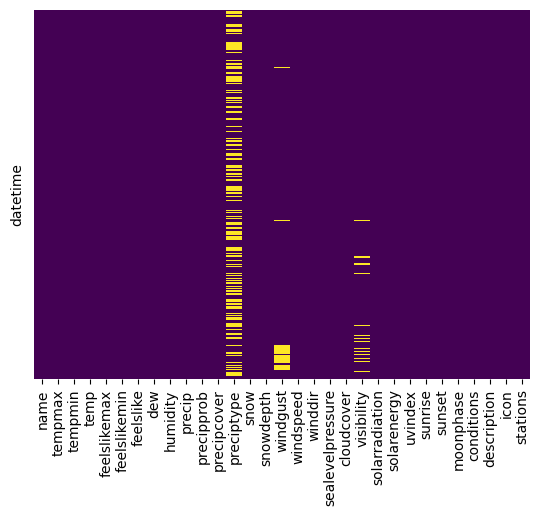

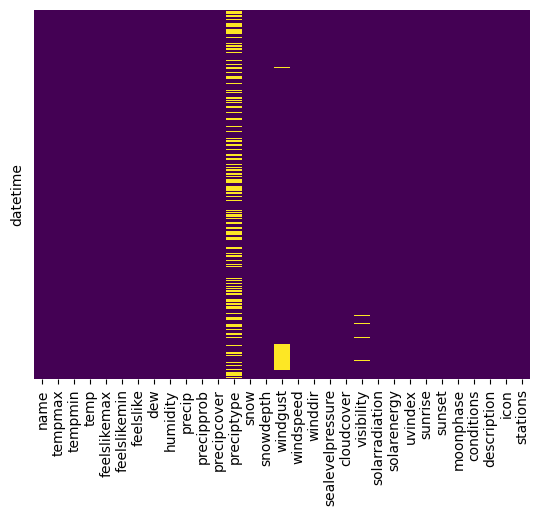

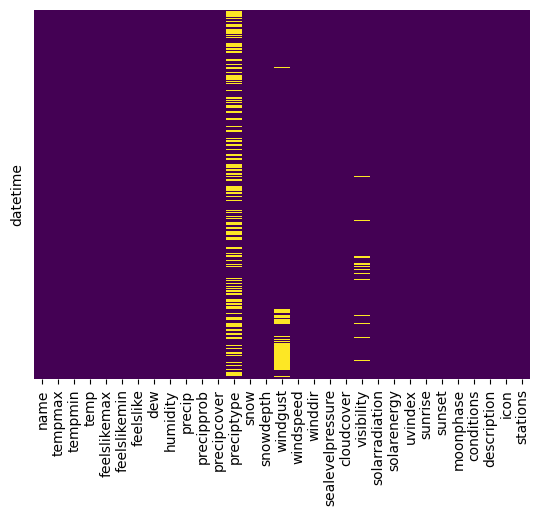

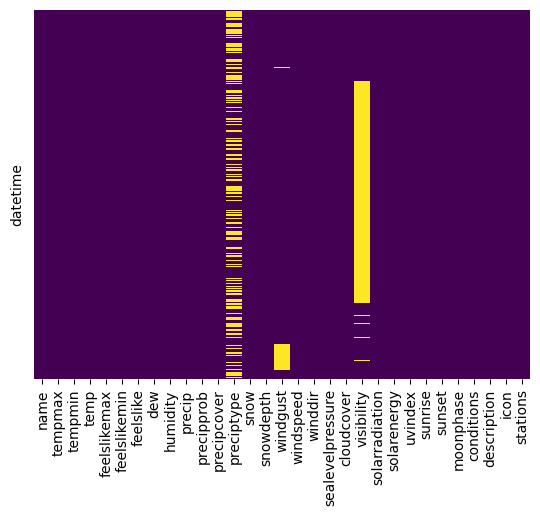

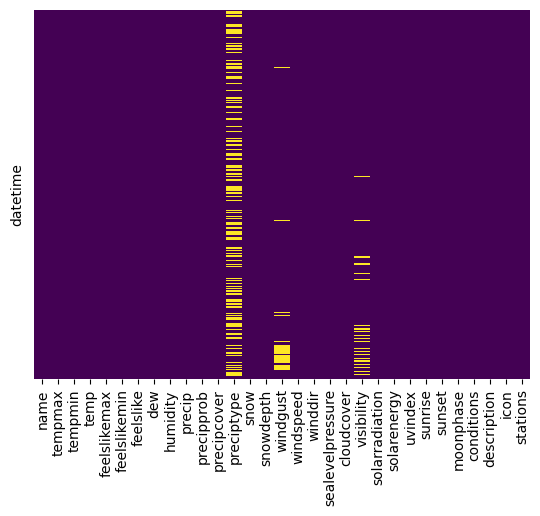

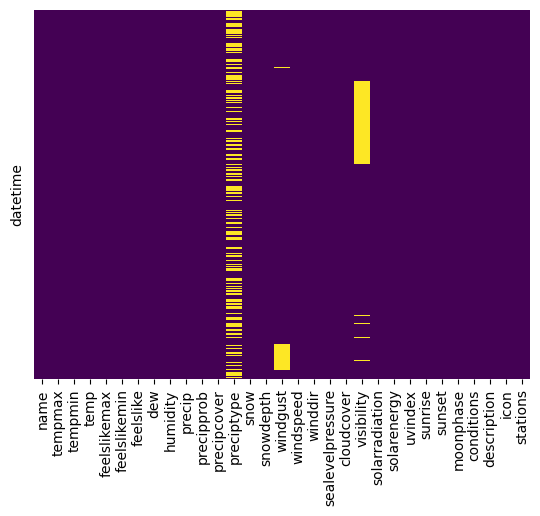

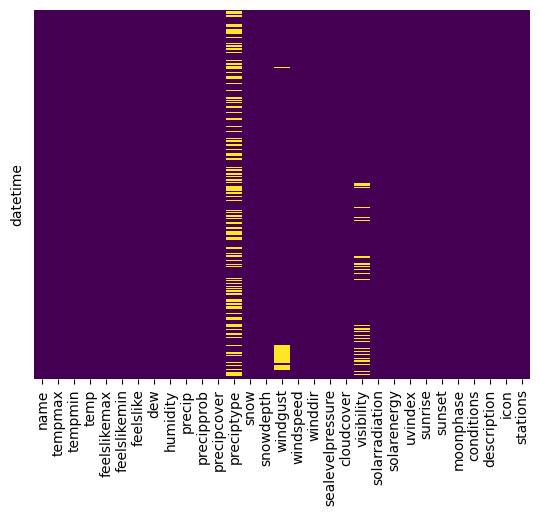

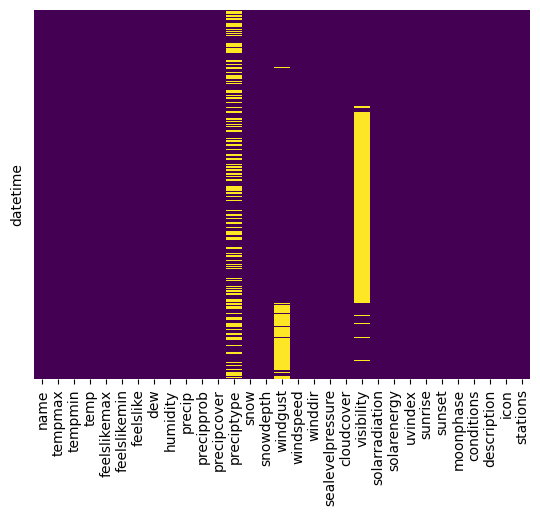

<Figure size 640x480 with 0 Axes>

In [23]:
for df in temp_datasets_c1:
    EDA_FS_03(df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2010-01-01 to 2021-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median         4042 non-null   float64
 1   value_std_dev  4042 non-null   float64
 2   SamplesNo      4042 non-null   float64
dtypes: float64(3)
memory usage: 137.0 KB


None

median           341
value_std_dev    341
SamplesNo        341
dtype: int64

#####################################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2010-01-01 to 2021-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median         4145 non-null   float64
 1   value_std_dev  4145 non-null   float64
 2   SamplesNo      4145 non-null   float64
dtypes: float64(3)
memory usage: 137.0 KB


None

median           238
value_std_dev    238
SamplesNo        238
dtype: int64

#####################################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2010-01-01 to 2021-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median         4007 non-null   float64
 1   value_std_dev  4007 non-null   float64
 2   SamplesNo      4007 non-null   float64
dtypes: float64(3)
memory usage: 137.0 KB


None

median           376
value_std_dev    376
SamplesNo        376
dtype: int64

#####################################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2010-01-01 to 2021-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median         2721 non-null   float64
 1   value_std_dev  2721 non-null   float64
 2   SamplesNo      2721 non-null   float64
dtypes: float64(3)
memory usage: 137.0 KB


None

median           1662
value_std_dev    1662
SamplesNo        1662
dtype: int64

#####################################################


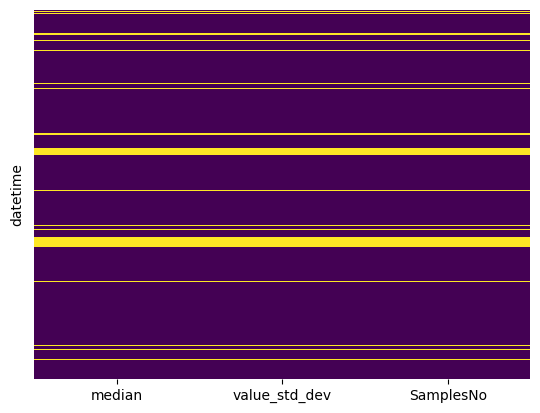

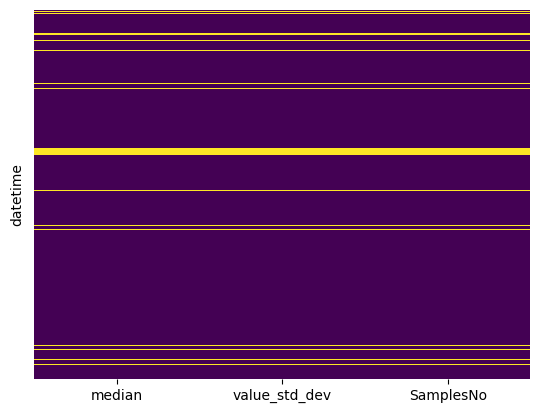

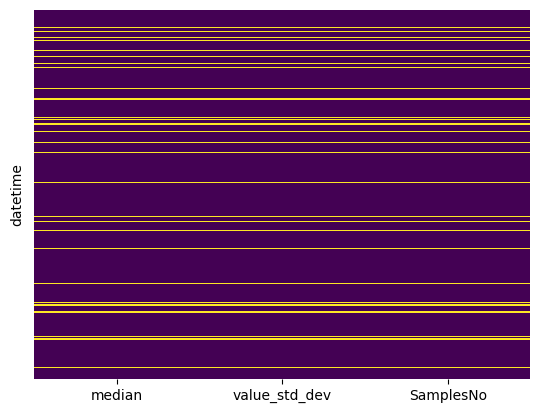

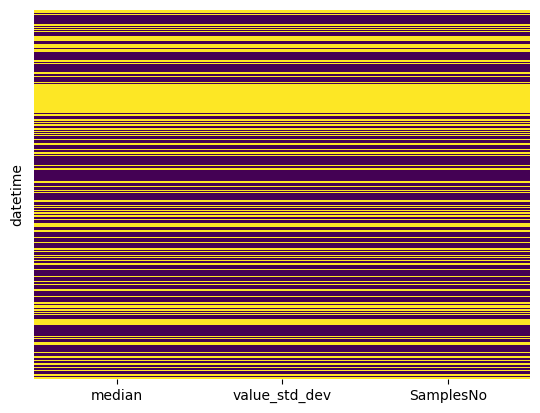

<Figure size 640x480 with 0 Axes>

In [24]:
for df in emission_datasets_c1:
    EDA_FS_03(df)

According to above situation of null values, it is better to fill the null values before put the information in same period

#### Fill null values in timeseries
Fill null values in time-series has different technics and it is not like fill null values in another dataset (for other datasets, we will find the distribution of feature and after that based on that we make decision).

In time-series we follow one of the below technics,
- back fill/forward fill,
- interpolation (has different methods: linear, polynomial, spline, nearest, quadratic)
- K-Nearest Neighbor Imputation (KNNImputer)
- Multivariate Imputation by Chained Equations (MICE) 


information is based on page: https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87

In [25]:
# providing mse function to select method of filling
def mse(actual, predicted):
    return np.square(np.subtract(np.array(actual), np.array(predicted))).mean()

In [26]:
# for evaluation I need to make manually Null value some of the samples with value
def preprocessing_fillna(dataset, feature, sample_number, random_state):
    main_df = dataset[feature].copy()
    df = main_df.dropna()
    sample_list = df.sample(n=sample_number,random_state=random_state)
    sample_list_idx = list(df.sample(n=sample_number,random_state=random_state).index)
    main_df[sample_list_idx] = np.nan
    return (main_df, sample_list_idx, sample_list)

In [27]:
def fillna_ffill_bfill(dataset, real_output, s_idx, method = ['ffill','bfill']):
    if method == 'ffill':
        fill_imputation = dataset.fillna(method='ffill')
    if method == 'bfill':
        fill_imputation = dataset.fillna(method='bfill')
    # evaluation part
    y_predict = fill_imputation[s_idx]
    mse_value = mse(real_output, y_predict)
    return mse_value

In [28]:
def fillna_interpolation(dataset, real_output, s_idx, method =['linear', 'quadratic', 'nearest']):
    interpolation = dataset.interpolate(method)
    # evaluation part
    y_predict = interpolation[s_idx]
    mse_value = mse(real_output, y_predict)
    return mse_value

In [29]:
# library for advance impute
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [30]:
def fillna_KNN(dataset, real_output, s_idx):
    scaler = MinMaxScaler(feature_range=(0, 1))
    df = dataset.values.reshape(-1, 1) 
    # updating dataset with scaler
    scaling = scaler.fit(df)
    df_knn = pd.DataFrame(scaling.transform(df))
    # define the KNNImputer
    knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
    # fill missing values
    knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn))
    knn_imputed = scaling.inverse_transform(knn_imputed)
    knn_imputed = pd.DataFrame(knn_imputed)
    knn_imputed.set_index(dataset.index, inplace=True)
    
    # evaluation part
    y_predict = knn_imputed.loc[s_idx]
    mse_value = mse(real_output, y_predict)
    return knn_imputer, mse_value
    

#### find the best method to fill null value of each dataset and feature

##### First emission datasets
I want to continue just with feature of 'median' in emission datasets

In [31]:
emission_datasets = [N2O_daily,SF6_daily,C2O_daily,CH4_daily]
emission_datasets_name = ['N2O_daily','SF6_daily','C2O_daily','CH4_daily']

In [32]:
for i in range(0,4):
    dataset_name = emission_datasets_name[i]
    Null_val_count = emission_datasets[0]['median'].isnull().sum()
    all_val_count = len(emission_datasets[0]['median'])
    SN = round((all_val_count - Null_val_count)*0.1)
    RS = 23
    df, y_idx, y = preprocessing_fillna(emission_datasets[i], 'median', sample_number=SN, random_state=RS)
    print(dataset_name)
    mse_ffill = fillna_ffill_bfill(df,method='ffill',real_output = y, s_idx = y_idx)
    print(f'MSE of Forward fill null: {mse_ffill}')
    mse_bfill = fillna_ffill_bfill(df,method='bfill',real_output = y, s_idx = y_idx)
    print(f'MSE of Backward fill null: {mse_bfill}')
    mse_int_linear = fillna_interpolation(df,method='linear',real_output = y, s_idx = y_idx)
    print(f'MSE of interpolate linear fill null: {mse_int_linear}')
    mse_int_nearest = fillna_interpolation(df,method='nearest',real_output = y, s_idx = y_idx)
    print(f'MSE of interpolate nearest fill null: {mse_int_nearest}')
    mse_int_quadratic = fillna_interpolation(df,method='quadratic',real_output = y, s_idx = y_idx)
    print(f'MSE of interpolate quadratic fill null: {mse_int_quadratic}')
    knn_imputer_N2O, mse_knn_imputer = fillna_KNN(df,real_output = y, s_idx = y_idx)
    print(f'MSE of knn_imputer fill null: {mse_knn_imputer}')
    print('########################################################################')
    

N2O_daily
MSE of Forward fill null: 0.19163139974779342
MSE of Backward fill null: 0.13794426229508228
MSE of interpolate linear fill null: 0.12467295672256444
MSE of interpolate nearest fill null: 0.1732795712484238
MSE of interpolate quadratic fill null: 0.20236295231874396
MSE of knn_imputer fill null: 41.299144090306086
########################################################################
SF6_daily
MSE of Forward fill null: 0.0023195662042875143
MSE of Backward fill null: 0.00235843505674653
MSE of interpolate linear fill null: 0.0017920173917070083
MSE of interpolate nearest fill null: 0.002380535939470364
MSE of interpolate quadratic fill null: 0.00253045657219554
MSE of knn_imputer fill null: 4.330904637099022
########################################################################
C2O_daily
MSE of Forward fill null: 1.8962370744010095
MSE of Backward fill null: 1.7184021437578816
MSE of interpolate linear fill null: 1.0000741896872218
MSE of interpolate nearest fill null: 1.

In [33]:
N2O_daily['median'].interpolate(method='linear',inplace = True)
N2O_daily['median'].isnull().sum()

0

In [34]:
SF6_daily['median'].interpolate(method='linear',inplace = True)
SF6_daily['median'].isnull().sum()

0

In [35]:
C2O_daily['median'].interpolate(method='linear',inplace = True)
C2O_daily['median'].isnull().sum()

206

<Figure size 640x480 with 0 Axes>

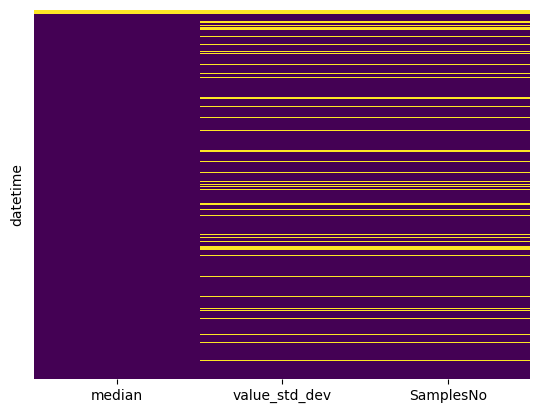

<Figure size 640x480 with 0 Axes>

In [36]:
sns.heatmap(C2O_daily.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.figure()

In [37]:
# becuase the first of dataset has null value that part not fill with interpolate methodology 
C2O_daily['median'].fillna(method='bfill',inplace=True)
C2O_daily['median'].isnull().sum()

0

In [38]:
CH4_daily['median'].interpolate(method='linear',inplace = True)
CH4_daily['median'].isnull().sum()

27

<Figure size 640x480 with 0 Axes>

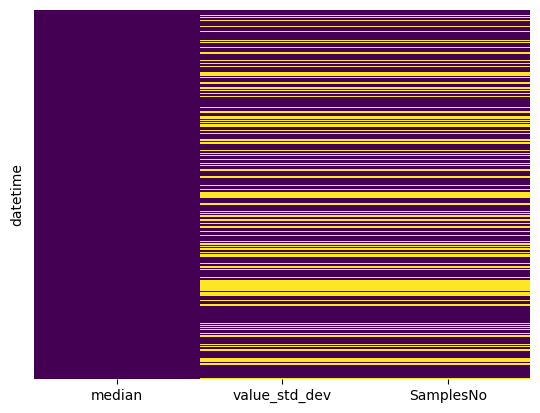

<Figure size 640x480 with 0 Axes>

In [39]:
sns.heatmap(CH4_daily.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.figure()

In [40]:
# becuase the first of dataset has null value that part not fill with interpolate methodology 
CH4_daily['median'].fillna(method='bfill',inplace=True)
CH4_daily['median'].isnull().sum()

0

##### Second Temp datasets
I need to fill null values for below features

- preciptype (object) need to change to number first
- windgust (float)
- visibility (float)

In [41]:
temp_datasets = [temp_df_Bregenz, temp_df_Romanshorn, temp_df_Friedrichshafen, 
                 temp_df_konstanz, temp_df_Lindau, tmp_df_Kreuzlingen, temp_df_Arbon, 
                 tmp_df_Überlingen]
temp_datasets_name = ['temp_df_Bregenz', 'temp_df_Romanshorn', 'temp_df_Friedrichshafen', 
                 'temp_df_konstanz', 'temp_df_Lindau', 'tmp_df_Kreuzlingen', 'temp_df_Arbon', 
                 'tmp_df_Überlingen']

In [42]:
for j in ['windgust','visibility']:
    print(j)
    print('############')
    for i in range(len(temp_datasets)):
        dataset_name = temp_datasets_name[i]
        Null_val_count = temp_datasets[0][j].isnull().sum()
        all_val_count = len(temp_datasets[0][j])
        SN = round((all_val_count - Null_val_count)*0.1)
        RS = 23
        df, y_idx, y = preprocessing_fillna(temp_datasets[i], j, sample_number=SN, random_state=RS)
        print(dataset_name)
        mse_ffill = fillna_ffill_bfill(df,method='ffill',real_output = y, s_idx = y_idx)
        print(f'MSE of Forward fill null: {mse_ffill}')
        mse_bfill = fillna_ffill_bfill(df,method='bfill',real_output = y, s_idx = y_idx)
        print(f'MSE of Backward fill null: {mse_bfill}')
        mse_int_linear = fillna_interpolation(df,method='linear',real_output = y, s_idx = y_idx)
        print(f'MSE of interpolate linear fill null: {mse_int_linear}')
        mse_int_nearest = fillna_interpolation(df,method='nearest',real_output = y, s_idx = y_idx)
        print(f'MSE of interpolate nearest fill null: {mse_int_nearest}')
        mse_int_quadratic = fillna_interpolation(df,method='quadratic',real_output = y, s_idx = y_idx)
        print(f'MSE of interpolate quadratic fill null: {mse_int_quadratic}')
        knn_imputer_N2O, mse_knn_imputer = fillna_KNN(df,real_output = y, s_idx = y_idx)
        print(f'MSE of knn_imputer fill null: {mse_knn_imputer}')
        print('########################################################################')

windgust
############
temp_df_Bregenz
MSE of Forward fill null: 286.7254746136865
MSE of Backward fill null: 236.32189845474613
MSE of interpolate linear fill null: 171.2295468481727
MSE of interpolate nearest fill null: 268.81448123620305
MSE of interpolate quadratic fill null: 195.32290058233087
MSE of knn_imputer fill null: 298.33432704023954
########################################################################
temp_df_Romanshorn
MSE of Forward fill null: 184.1583885209713
MSE of Backward fill null: 196.1697571743929
MSE of interpolate linear fill null: 112.528902480287
MSE of interpolate nearest fill null: 175.7867770419426
MSE of interpolate quadratic fill null: 153.2192842744743
MSE of knn_imputer fill null: 186.221740055218
########################################################################
temp_df_Friedrichshafen
MSE of Forward fill null: 219.4873289183223
MSE of Backward fill null: 205.465055187638
MSE of interpolate linear fill null: 137.557512329434
MSE of interpolat

In [43]:
for i in range(len(temp_datasets)):
    print(f'Fill value for "windgust" in {temp_datasets_name[i]} dataset:')
    temp_datasets[i]['windgust'].interpolate(method='linear',inplace = True)
    print(f'remain null values in the specific feature {temp_datasets[i]["windgust"].isnull().sum()}')


Fill value for "windgust" in temp_df_Bregenz dataset:
remain null values in the specific feature 0
Fill value for "windgust" in temp_df_Romanshorn dataset:
remain null values in the specific feature 0
Fill value for "windgust" in temp_df_Friedrichshafen dataset:
remain null values in the specific feature 0
Fill value for "windgust" in temp_df_konstanz dataset:
remain null values in the specific feature 0
Fill value for "windgust" in temp_df_Lindau dataset:
remain null values in the specific feature 0
Fill value for "windgust" in tmp_df_Kreuzlingen dataset:
remain null values in the specific feature 0
Fill value for "windgust" in temp_df_Arbon dataset:
remain null values in the specific feature 0
Fill value for "windgust" in tmp_df_Überlingen dataset:
remain null values in the specific feature 0


In [44]:
for i in range(len(temp_datasets)):
    print(f'Fill value for "visibility" in {temp_datasets_name[i]} dataset:')
    temp_datasets[i]['visibility'].interpolate(method='linear',inplace = True)
    print(f'remain null values in the specific feature {0}' %(temp_datasets[i]['visibility'].isnull().sum()))


Fill value for "visibility" in temp_df_Bregenz dataset:
remain null values in the specific feature 0
Fill value for "visibility" in temp_df_Romanshorn dataset:
remain null values in the specific feature 0
Fill value for "visibility" in temp_df_Friedrichshafen dataset:
remain null values in the specific feature 0
Fill value for "visibility" in temp_df_konstanz dataset:
remain null values in the specific feature 0
Fill value for "visibility" in temp_df_Lindau dataset:
remain null values in the specific feature 0
Fill value for "visibility" in tmp_df_Kreuzlingen dataset:
remain null values in the specific feature 0
Fill value for "visibility" in temp_df_Arbon dataset:
remain null values in the specific feature 0
Fill value for "visibility" in tmp_df_Überlingen dataset:
remain null values in the specific feature 0


Explor datasets again to go for next step of preparation

temp_df_Bregenz
######################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4807 entries, 2010-01-01 to 2023-02-28
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4807 non-null   object        
 1   tempmax           4807 non-null   float64       
 2   tempmin           4807 non-null   float64       
 3   temp              4807 non-null   float64       
 4   feelslikemax      4807 non-null   float64       
 5   feelslikemin      4807 non-null   float64       
 6   feelslike         4807 non-null   float64       
 7   dew               4807 non-null   float64       
 8   humidity          4807 non-null   float64       
 9   precip            4807 non-null   float64       
 10  precipprob        4807 non-null   int64         
 11  precipcover       4807 non-null   float64       
 12  preciptype        2871 non-null   object        
 13  snow              480

None

name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1936
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               2
dtype: int64

#####################################################
temp_df_Romanshorn
######################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4807 entries, 2010-01-01 to 2023-02-28
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4807 non-null   object        
 1   tempmax           4807 non-null   float64       
 2   tempmin           4807 non-null   float64       
 3   temp              4807 non-null   float64       
 4   feelslikemax      4807 non-null   float64       
 5   feelslikemin      4807 non-null   float64       
 6   feelslike         4807 non-null   float64       
 7   dew               4807 non-null   float64       
 8   humidity          4807 non-null   float64       
 9   precip            4807 non-null   float64       
 10  precipprob        4807 non-null   int64         
 11  precipcover       4807 non-null   float64       
 12  preciptype        

None

name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1781
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

#####################################################
temp_df_Friedrichshafen
######################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4807 entries, 2010-01-01 to 2023-02-28
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4807 non-null   object        
 1   tempmax           4807 non-null   float64       
 2   tempmin           4807 non-null   float64       
 3   temp              4807 non-null   float64       
 4   feelslikemax      4807 non-null   float64       
 5   feelslikemin      4807 non-null   float64       
 6   feelslike         4807 non-null   float64       
 7   dew               4807 non-null   float64       
 8   humidity          4807 non-null   float64       
 9   precip            4807 non-null   float64       
 10  precipprob        4807 non-null   int64         
 11  precipcover       4807 non-null   float64       
 12  preciptype   

None

name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1917
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               2
dtype: int64

#####################################################
temp_df_konstanz
######################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4807 entries, 2010-01-01 to 2023-02-28
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4807 non-null   object        
 1   tempmax           4807 non-null   float64       
 2   tempmin           4807 non-null   float64       
 3   temp              4807 non-null   float64       
 4   feelslikemax      4807 non-null   float64       
 5   feelslikemin      4807 non-null   float64       
 6   feelslike         4807 non-null   float64       
 7   dew               4807 non-null   float64       
 8   humidity          4807 non-null   float64       
 9   precip            4807 non-null   float64       
 10  precipprob        4807 non-null   int64         
 11  precipcover       4807 non-null   float64       
 12  preciptype        28

None

name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1927
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               2
dtype: int64

#####################################################
temp_df_Lindau
######################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4807 entries, 2010-01-01 to 2023-02-28
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4807 non-null   object        
 1   tempmax           4807 non-null   float64       
 2   tempmin           4807 non-null   float64       
 3   temp              4807 non-null   float64       
 4   feelslikemax      4807 non-null   float64       
 5   feelslikemin      4807 non-null   float64       
 6   feelslike         4807 non-null   float64       
 7   dew               4807 non-null   float64       
 8   humidity          4807 non-null   float64       
 9   precip            4807 non-null   float64       
 10  precipprob        4807 non-null   int64         
 11  precipcover       4807 non-null   float64       
 12  preciptype        3035

None

name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1772
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               2
dtype: int64

#####################################################
tmp_df_Kreuzlingen
######################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4807 entries, 2010-01-01 to 2023-02-28
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4807 non-null   object        
 1   tempmax           4807 non-null   float64       
 2   tempmin           4807 non-null   float64       
 3   temp              4807 non-null   float64       
 4   feelslikemax      4807 non-null   float64       
 5   feelslikemin      4807 non-null   float64       
 6   feelslike         4807 non-null   float64       
 7   dew               4807 non-null   float64       
 8   humidity          4807 non-null   float64       
 9   precip            4807 non-null   float64       
 10  precipprob        4807 non-null   int64         
 11  precipcover       4807 non-null   float64       
 12  preciptype        

None

name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1968
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

#####################################################
temp_df_Arbon
######################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4807 entries, 2010-01-01 to 2023-02-28
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4807 non-null   object        
 1   tempmax           4807 non-null   float64       
 2   tempmin           4807 non-null   float64       
 3   temp              4807 non-null   float64       
 4   feelslikemax      4807 non-null   float64       
 5   feelslikemin      4807 non-null   float64       
 6   feelslike         4807 non-null   float64       
 7   dew               4807 non-null   float64       
 8   humidity          4807 non-null   float64       
 9   precip            4807 non-null   float64       
 10  precipprob        4807 non-null   int64         
 11  precipcover       4807 non-null   float64       
 12  preciptype        3041 

None

name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1766
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

#####################################################
tmp_df_Überlingen
######################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4807 entries, 2010-01-01 to 2023-02-28
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              4807 non-null   object        
 1   tempmax           4807 non-null   float64       
 2   tempmin           4807 non-null   float64       
 3   temp              4807 non-null   float64       
 4   feelslikemax      4807 non-null   float64       
 5   feelslikemin      4807 non-null   float64       
 6   feelslike         4807 non-null   float64       
 7   dew               4807 non-null   float64       
 8   humidity          4807 non-null   float64       
 9   precip            4807 non-null   float64       
 10  precipprob        4807 non-null   float64       
 11  precipcover       4807 non-null   float64       
 12  preciptype        2

None

name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1971
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               2
dtype: int64

#####################################################


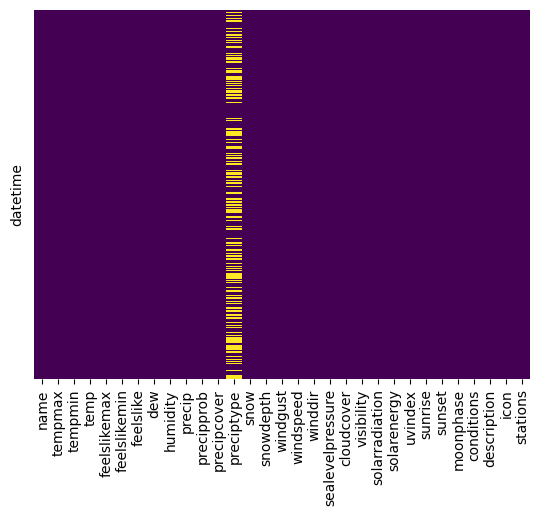

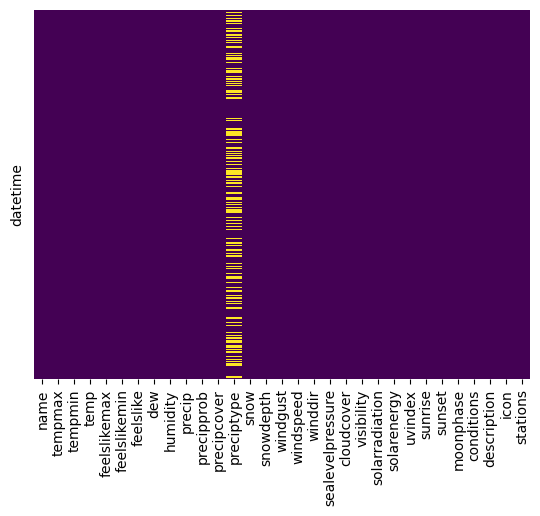

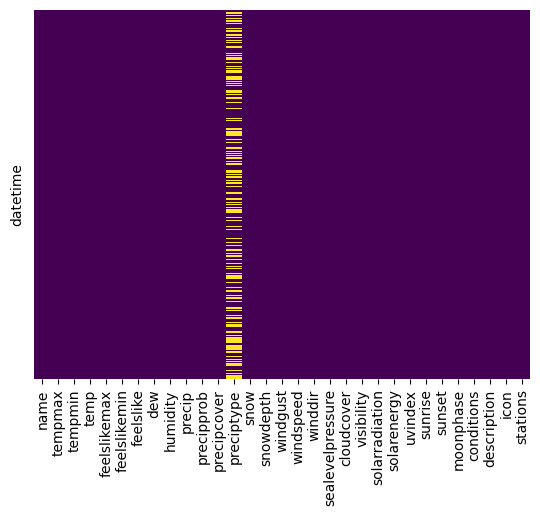

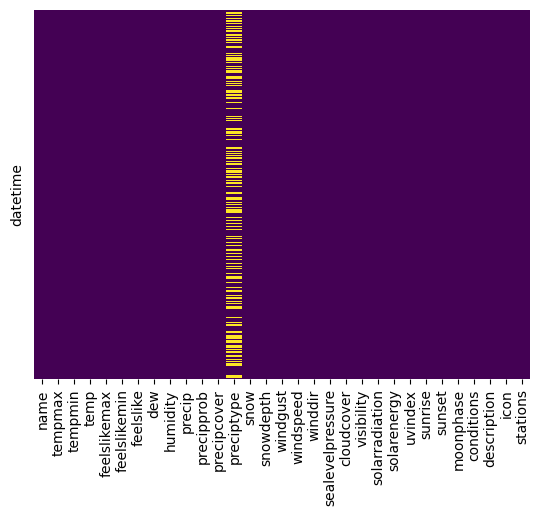

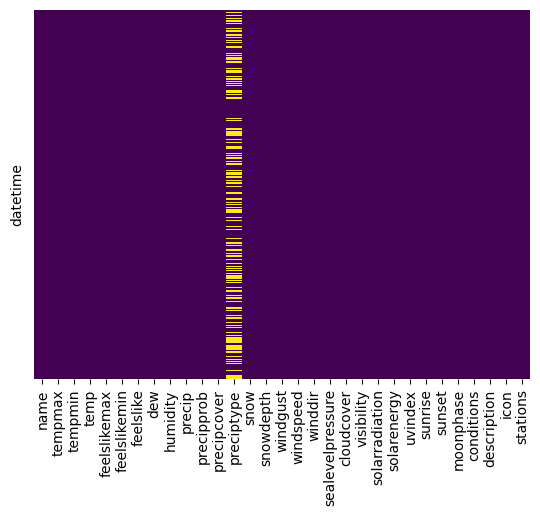

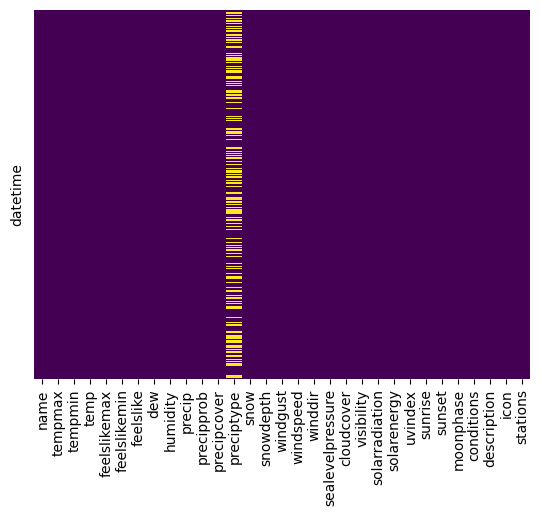

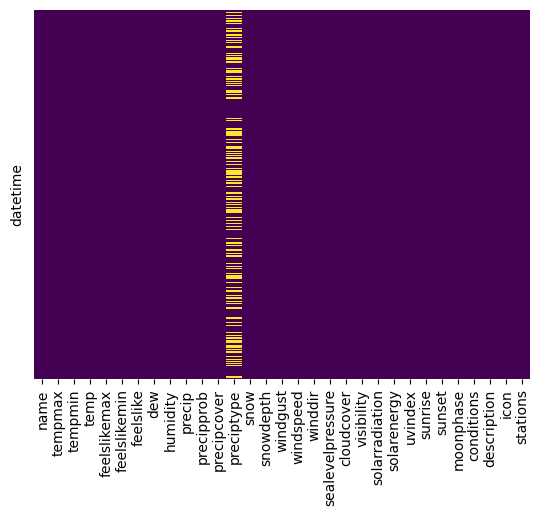

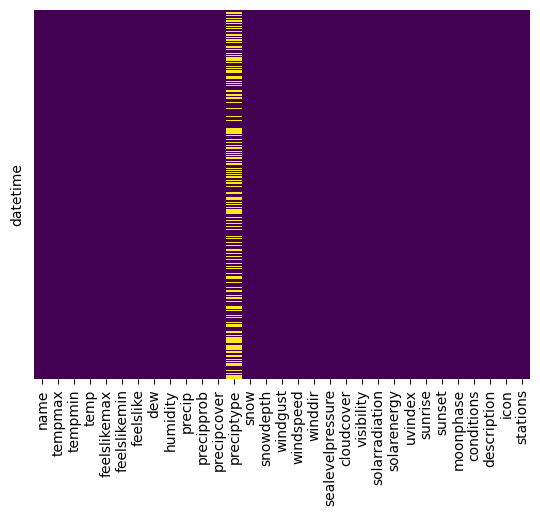

<Figure size 640x480 with 0 Axes>

In [45]:
for i in range(len(temp_datasets)):
    print(temp_datasets_name[i])
    print('######################')
    EDA_FS_03(temp_datasets[i])


N2O_daily
######################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8992 entries, 1998-06-16 to 2023-01-28
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median         8992 non-null   float64
 1   value_std_dev  7934 non-null   float64
 2   SamplesNo      7934 non-null   float64
dtypes: float64(3)
memory usage: 539.0 KB


None

median              0
value_std_dev    1058
SamplesNo        1058
dtype: int64

#####################################################
SF6_daily
######################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8992 entries, 1998-06-16 to 2023-01-28
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median         8992 non-null   float64
 1   value_std_dev  8242 non-null   float64
 2   SamplesNo      8242 non-null   float64
dtypes: float64(3)
memory usage: 539.0 KB


None

median             0
value_std_dev    750
SamplesNo        750
dtype: int64

#####################################################
C2O_daily
######################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17896 entries, 1973-01-02 to 2021-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median         17896 non-null  float64
 1   value_std_dev  15823 non-null  float64
 2   SamplesNo      15823 non-null  float64
dtypes: float64(3)
memory usage: 1.1 MB


None

median              0
value_std_dev    2073
SamplesNo        2073
dtype: int64

#####################################################
CH4_daily
######################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13148 entries, 1986-01-02 to 2021-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median         13148 non-null  float64
 1   value_std_dev  8622 non-null   float64
 2   SamplesNo      8622 non-null   float64
dtypes: float64(3)
memory usage: 926.9 KB


None

median              0
value_std_dev    4526
SamplesNo        4526
dtype: int64

#####################################################


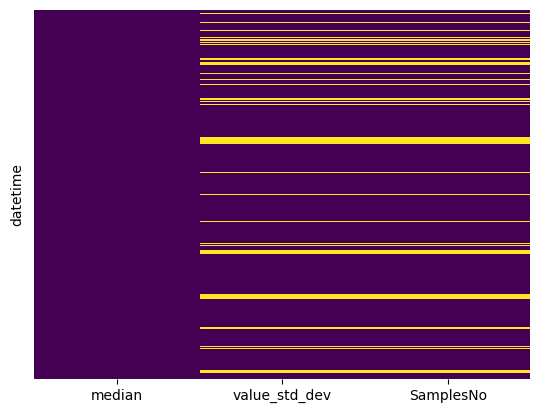

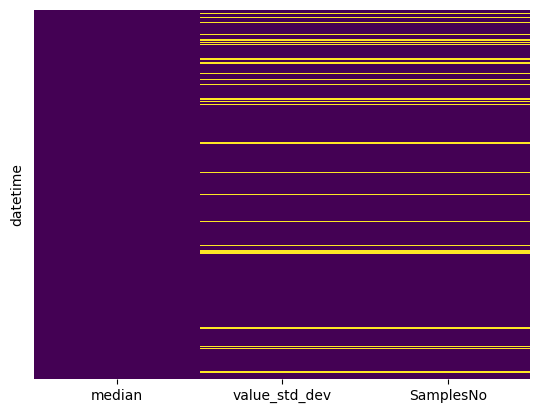

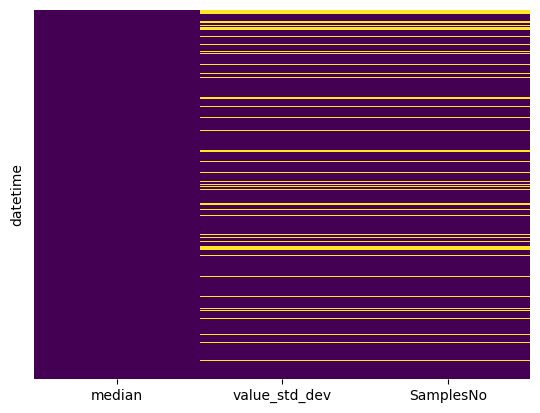

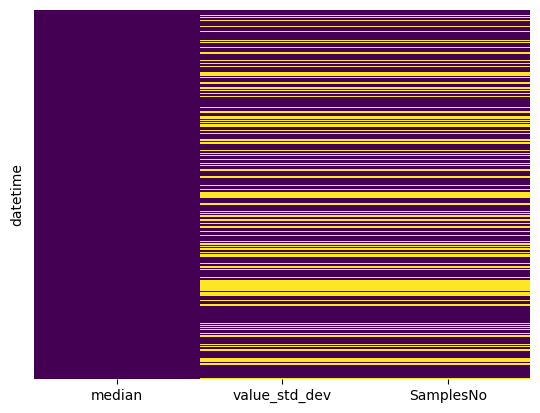

<Figure size 640x480 with 0 Axes>

In [46]:
for i in range(len(emission_datasets)):
    print(emission_datasets_name[i])
    print('######################')
    EDA_FS_03(emission_datasets[i])

Just Temp datasets preprocessing remain and first figure out about,
- datetime features (sunraise, sunset)
- object features (preciptype, conditions, description, icon, station)
- fill remain Null values in 'preciptype' feature

In [47]:
temp_datasets = [temp_df_Bregenz, temp_df_Romanshorn, temp_df_Friedrichshafen, 
                 temp_df_konstanz, temp_df_Lindau, tmp_df_Kreuzlingen, temp_df_Arbon, 
                 tmp_df_Überlingen]
temp_datasets_name = ['temp_df_Bregenz', 'temp_df_Romanshorn', 'temp_df_Friedrichshafen', 
                 'temp_df_konstanz', 'temp_df_Lindau', 'tmp_df_Kreuzlingen', 'temp_df_Arbon', 
                 'tmp_df_Überlingen']

In [48]:
# make simple backup of my datasets before continue work with them
for i in range(len(temp_datasets)):
    tem = temp_datasets_name[i]+'_1'
    tem = temp_datasets[i].copy()

In [49]:
# calaculation of day length
def preprocess_temp2(dataset):
    dataset['day_len(permin)'] = dataset['sunset'] - dataset['sunrise']
    dataset['day_len(permin)'] = dataset['day_len(permin)'].apply(lambda x: round(x.seconds/60))
    dataset.drop(columns={'sunset','sunrise'},axis=1,inplace=True)

In [50]:
for df in temp_datasets:
    preprocess_temp2(df)

##### wordcount graph
The 'desctiption' feature is not useful for more investigation but it can give good point of view of the most possible weather around the lake so I just use a graph to see them
- import necessarily libraries
- put all of temp dataset 'description'  feature together

In [51]:
import pandasql as ps
import wordcloud
from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('day')
STOPWORDS.add('chance')

In [52]:
df_wc = []
for df in temp_datasets:
    df_wc.append(df['description'])
df_wordcount = pd.concat(df_wc)

(-0.5, 1599.5, 799.5, -0.5)

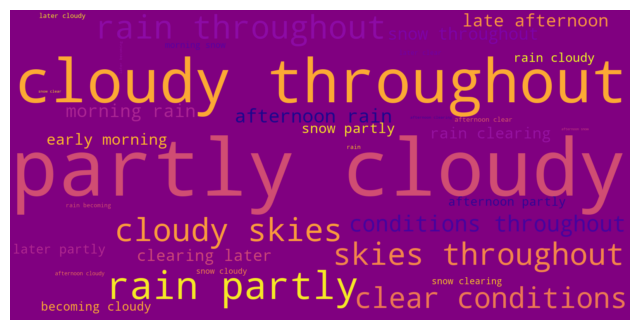

In [53]:
# add 'day'&'chance' to stopwords list to ignore showing
word_string=" ".join(df_wordcount.str.lower())
plt.figure(figsize=(8,6))
wc = WordCloud(background_color="purple", stopwords = STOPWORDS, max_words=100, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)
plt.imshow(wc.recolor(colormap= 'plasma' , random_state=17), interpolation="bilinear")
plt.axis('off')

In [54]:
temp_datasets[0][['conditions','icon','preciptype']]

,conditions,icon,preciptype
datetime,,,
2010-01-01,"Snow, Rain, Overcast",snow,"rain,snow"
2010-01-02,"Snow, Rain, Partially cloudy",snow,"rain,snow"
2010-01-03,Partially cloudy,snow,NaN
2010-01-04,Partially cloudy,partly-cloudy-day,NaN
2010-01-05,Partially cloudy,partly-cloudy-day,NaN
...,...,...,...
2023-02-24,"Rain, Partially cloudy",rain,rain
2023-02-25,"Snow, Rain, Overcast",snow,"rain,snow"
2023-02-26,"Snow, Rain, Partially cloudy",snow,"rain,snow"


There is issue of 'icon' feature value in '2010-01-03' because that day wasn't any precipation is reported and condition is 'partially cloudy', so the icon value should be 'Partially cloudy' instead 'snow'.

In general, if I don't see this issue, I will investigate about 'icon' values based on precipation to sure

In [55]:
# check the icon according to precipitation features
temp_datasets[0][temp_datasets[0]['preciptype'].isnull()].groupby('icon')['icon'].count()

icon
clear-day             355
cloudy                 73
fog                     5
partly-cloudy-day    1407
snow                   96
Name: icon, dtype: int64

For 96 samples there is not any preciption but they reported and 'snow' weather. So, I think maybe there is other issue with weather icon reported.

In [56]:
temp_datasets[0][temp_datasets[0]['preciptype'].str.contains('rain', na=False)].groupby(['icon','preciptype'])['icon'].count().sort_values(ascending = False)

icon               preciptype            
rain               rain                      1719
snow               rain                       536
                   rain,snow                  395
rain               rain,snow                  126
partly-cloudy-day  rain                        20
clear-day          rain                         3
cloudy             rain                         3
                   rain,snow                    1
snow               rain,freezingrain,snow       1
Name: icon, dtype: int64

In [57]:
# check becuase there is sample with rain,freezingrain,snow value
temp_datasets[0].groupby('preciptype')['preciptype'].count()

preciptype
rain                      2281
rain,freezingrain,snow       1
rain,snow                  522
snow                        67
Name: preciptype, dtype: int64

According to above information, there is a little preciptype value with 'rain,freezingrain,snow' so I just update this value of them to 'rain,snow'

In [58]:
# update 'rain,freezingrain,snow' to 'rain,snow'
for i in range(len(temp_datasets)):
    print(temp_datasets_name[i])
    print(f"The Number of sample that will be updated {temp_datasets[i].loc[temp_datasets[i]['preciptype'] == 'rain,freezingrain,snow','preciptype'].count()}")
    temp_datasets[i].loc[temp_datasets[i]['preciptype'] == 'rain,freezingrain,snow','preciptype'] = 'rain,snow'

temp_df_Bregenz
The Number of sample that will be updated 1
temp_df_Romanshorn
The Number of sample that will be updated 0
temp_df_Friedrichshafen
The Number of sample that will be updated 2
temp_df_konstanz
The Number of sample that will be updated 2
temp_df_Lindau
The Number of sample that will be updated 1
tmp_df_Kreuzlingen
The Number of sample that will be updated 2
temp_df_Arbon
The Number of sample that will be updated 0
tmp_df_Überlingen
The Number of sample that will be updated 2


In [59]:
# check
for i in range(len(temp_datasets)):
    print(temp_datasets_name[i])
    print(f"check the remain Number {temp_datasets[i].loc[temp_datasets[i]['preciptype'] == 'rain,freezingrain,snow','preciptype'].count()}")
 

temp_df_Bregenz
check the remain Number 0
temp_df_Romanshorn
check the remain Number 0
temp_df_Friedrichshafen
check the remain Number 0
temp_df_konstanz
check the remain Number 0
temp_df_Lindau
check the remain Number 0
tmp_df_Kreuzlingen
check the remain Number 0
temp_df_Arbon
check the remain Number 0
tmp_df_Überlingen
check the remain Number 0


- Need to change 'icon' feature values for correction (the affection less so no more investigation)
- drop 'precipprob' not valuable data & 'preciptype' duplicate inforamtion with 'conditions' & 'description' after create good figure of existance words

In [60]:
for df in temp_datasets:
    df.drop(['precipprob','preciptype','conditions','description','stations'], axis = 1, inplace=True)

Next step,
- join all temp datasets
- combine features
- use 'mean' for numberic features and 'mode' for categorical features to get one out put for each sample

In [61]:
from statistics import mean, mode

In [62]:
# join all temp dataset
temp_all = temp_datasets[0]
for i in range(len(temp_datasets)-1):
    temp_all = temp_all.join(temp_datasets[i+1], rsuffix=str(i))


In [63]:
temp_all_col = list(temp_all.columns)
for i in range(0,25):
    temp_all[temp_all_col[i]] = temp_all[[temp_all_col[i],temp_all_col[i+25],temp_all_col[i+50],temp_all_col[i+75],
             temp_all_col[i+100],temp_all_col[i+125],temp_all_col[i+150],temp_all_col[i+175]]].values.tolist()

In [64]:
df_temp_all_col = list(temp_datasets[0].columns)
df_temp_all = temp_all[df_temp_all_col]

In [65]:
temp_datasets[0].info()
# shows instead of 'icon' other features are numberic

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4807 entries, 2010-01-01 to 2023-02-28
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4807 non-null   object 
 1   tempmax           4807 non-null   float64
 2   tempmin           4807 non-null   float64
 3   temp              4807 non-null   float64
 4   feelslikemax      4807 non-null   float64
 5   feelslikemin      4807 non-null   float64
 6   feelslike         4807 non-null   float64
 7   dew               4807 non-null   float64
 8   humidity          4807 non-null   float64
 9   precip            4807 non-null   float64
 10  precipcover       4807 non-null   float64
 11  snow              4807 non-null   float64
 12  snowdepth         4807 non-null   float64
 13  windgust          4807 non-null   float64
 14  windspeed         4807 non-null   float64
 15  winddir           4807 non-null   float64
 16  sealevelpressure  4807 n

In [66]:
df_temp_all_col.remove('name')
df_temp_all_col.remove('icon')

In [67]:
for item in df_temp_all_col:
    df_temp_all[item] = df_temp_all[item].apply(lambda x: mean(x))
df_temp_all['icon'] = df_temp_all['icon'].apply(lambda x: mode(x))

C:\Users\Mehrad Tavanamehr\AppData\Local\Temp\ipykernel_6468\2693518756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_all[item] = df_temp_all[item].apply(lambda x: mean(x))
C:\Users\Mehrad Tavanamehr\AppData\Local\Temp\ipykernel_6468\2693518756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_all['icon'] = df_temp_all['icon'].apply(lambda x: mode(x))


In [76]:
df_temp_all[df_temp_all.index >= '2023-01-01']

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon,day_len(permin)
datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-01,"[Bregenz, Romanshorn, Friedrichshafen, konstan...",16.0250,6.4750,1.053750e+01,16.0250,5.5000,10.2000,6.0250,74.7625,0.000000,...,211.8375,1023.2250,65.7875,26.4250,58.9125,5.0250,3.375,0.31,partly-cloudy-day,510.375
2023-01-02,"[Bregenz, Romanshorn, Friedrichshafen, konstan...",12.3000,4.9000,8.587500e+00,12.3000,4.4625,8.3000,4.9875,79.3250,0.016250,...,217.6000,1023.6875,82.6500,21.9875,49.5375,4.2125,2.375,0.35,partly-cloudy-day,511.375
2023-01-03,"[Bregenz, Romanshorn, Friedrichshafen, konstan...",9.3750,4.5750,7.162500e+00,8.5750,3.9250,6.8750,6.4750,95.4625,2.738625,...,290.9125,1031.0750,93.7000,19.1250,9.0000,0.8000,0.625,0.38,rain,512.375
2023-01-04,"[Bregenz, Romanshorn, Friedrichshafen, konstan...",10.0250,3.6000,6.800000e+00,9.2125,2.0500,5.2750,4.3250,85.1750,0.000000,...,214.4500,1030.3125,88.3125,19.8625,29.2000,2.5375,1.375,0.41,cloudy,513.375
2023-01-05,"[Bregenz, Romanshorn, Friedrichshafen, konstan...",11.4625,6.9125,9.825000e+00,11.4625,5.8125,8.8500,6.8875,82.3000,0.442875,...,217.5625,1026.0625,88.6250,23.7625,22.2875,1.9875,1.750,0.45,rain,514.750
2023-01-06,"[Bregenz, Romanshorn, Friedrichshafen, konstan...",9.1500,3.6875,6.375000e+00,8.3625,3.0125,5.7250,4.9500,91.0250,0.000000,...,210.8875,1025.3125,76.4875,21.6875,42.2750,3.6625,2.625,0.48,partly-cloudy-day,516.250
2023-01-07,"[Bregenz, Romanshorn, Friedrichshafen, konstan...",7.6375,1.6375,4.512500e+00,7.1000,0.8875,3.9375,2.8750,89.5375,0.000000,...,129.7250,1019.9500,55.1625,26.9250,57.9875,5.0125,3.375,0.50,partly-cloudy-day,517.375
2023-01-08,"[Bregenz, Romanshorn, Friedrichshafen, konstan...",5.9250,0.7500,3.675000e+00,5.7125,-1.1250,2.8500,2.6500,93.2875,1.805750,...,95.8000,1010.5125,93.9500,12.0000,20.0000,1.7875,1.250,0.55,rain,519.125
2023-01-09,"[Bregenz, Romanshorn, Friedrichshafen, konstan...",7.1500,3.4000,5.275000e+00,5.6375,-0.2250,2.5750,2.3750,82.1125,6.677750,...,226.0875,1008.1375,92.5000,21.8375,39.6500,3.4250,2.250,0.58,snow,520.375


In [68]:
df_temp_all.head()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon,day_len(permin)
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01,"[Bregenz, Romanshorn, Friedrichshafen, konstan...",3.6625,-0.3125,2.35,3.6625,-5.3250,1.2000,1.8375,96.1875,14.975125,...,265.3875,994.5750,93.8000,8.5250,33.1625,2.8375,1.250,0.52,snow,510.375
2010-01-02,"[Bregenz, Romanshorn, Friedrichshafen, konstan...",0.2750,-6.1000,-3.00,-4.1625,-9.9375,-7.2375,-5.9375,80.4750,0.822250,...,253.0000,1017.0000,79.4875,11.3500,42.4375,3.6625,2.000,0.56,snow,511.375
2010-01-03,"[Bregenz, Romanshorn, Friedrichshafen, konstan...",-1.4500,-8.1875,-5.80,-1.4500,-13.0500,-8.4250,-10.5500,70.0375,0.000000,...,201.6250,1023.4000,30.8250,29.4000,80.0750,6.9125,3.875,0.59,snow,512.375
2010-01-04,"[Bregenz, Romanshorn, Friedrichshafen, konstan...",-3.6875,-8.5000,-6.80,-3.6875,-12.2125,-8.2875,-9.1500,83.8125,0.000000,...,205.9875,1017.1375,34.2875,14.4750,71.1750,6.1375,3.875,0.63,partly-cloudy-day,513.500
2010-01-05,"[Bregenz, Romanshorn, Friedrichshafen, konstan...",-4.2500,-7.9125,-5.95,-4.6125,-11.3500,-7.9250,-7.5625,88.6250,0.000000,...,48.0125,1008.2250,61.0625,6.8125,76.8000,6.5375,3.875,0.66,partly-cloudy-day,515.125


In [69]:
df_temp_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4807 entries, 2010-01-01 to 2023-02-28
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4807 non-null   object 
 1   tempmax           4807 non-null   float64
 2   tempmin           4807 non-null   float64
 3   temp              4807 non-null   float64
 4   feelslikemax      4807 non-null   float64
 5   feelslikemin      4807 non-null   float64
 6   feelslike         4807 non-null   float64
 7   dew               4807 non-null   float64
 8   humidity          4807 non-null   float64
 9   precip            4807 non-null   float64
 10  precipcover       4807 non-null   float64
 11  snow              4807 non-null   float64
 12  snowdepth         4807 non-null   float64
 13  windgust          4807 non-null   float64
 14  windspeed         4807 non-null   float64
 15  winddir           4807 non-null   float64
 16  sealevelpressure  4807 n

In [70]:
df_temp_all.groupby('icon')['icon'].count()

icon
clear-day             478
cloudy                 68
fog                     4
partly-cloudy-day    1237
rain                 2369
snow                  651
Name: icon, dtype: int64

In [71]:
df_temp_all.loc[df_temp_all['icon'] == 'fog','icon'] = 'partly-cloudy-day'

In [72]:
df_temp_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4807 entries, 2010-01-01 to 2023-02-28
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4807 non-null   object 
 1   tempmax           4807 non-null   float64
 2   tempmin           4807 non-null   float64
 3   temp              4807 non-null   float64
 4   feelslikemax      4807 non-null   float64
 5   feelslikemin      4807 non-null   float64
 6   feelslike         4807 non-null   float64
 7   dew               4807 non-null   float64
 8   humidity          4807 non-null   float64
 9   precip            4807 non-null   float64
 10  precipcover       4807 non-null   float64
 11  snow              4807 non-null   float64
 12  snowdepth         4807 non-null   float64
 13  windgust          4807 non-null   float64
 14  windspeed         4807 non-null   float64
 15  winddir           4807 non-null   float64
 16  sealevelpressure  4807 n

In [73]:
df_temp_all.isnull().sum()

name                0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipcover         0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
moonphase           0
icon                0
day_len(permin)     0
dtype: int64

In [74]:
df_temp_all['sealevelpressure'].interpolate(method='linear',inplace = True)

C:\Users\Mehrad Tavanamehr\AppData\Local\Temp\ipykernel_6468\909797547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_all['sealevelpressure'].interpolate(method='linear',inplace = True)


In [196]:
df_temp_all.groupby('icon')['icon'].count()

icon
clear-day             477
cloudy                 68
partly-cloudy-day    1242
rain                 2369
snow                  651
Name: icon, dtype: int64

In [197]:
for i in range(len(temp_datasets)):
    print(temp_datasets_name[i])
    temp_datasets[i].loc[temp_datasets[i]['icon'] == 'fog','icon'] = 'partly-cloudy-day'

temp_df_Bregenz
temp_df_Romanshorn
temp_df_Friedrichshafen
temp_df_konstanz
temp_df_Lindau
tmp_df_Kreuzlingen
temp_df_Arbon
tmp_df_Überlingen


[]

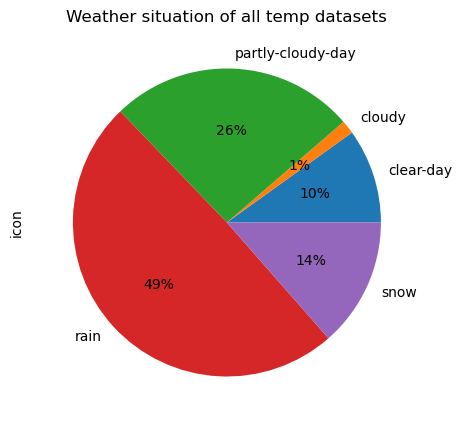

In [199]:
plt.figure(figsize=(8,5))
df_temp_all.groupby('icon')['icon'].count().plot(kind='pie', autopct='%.0f%%')
plt.title('Weather situation of all temp datasets')
#plt.legend(loc='upper left')
plt.plot()

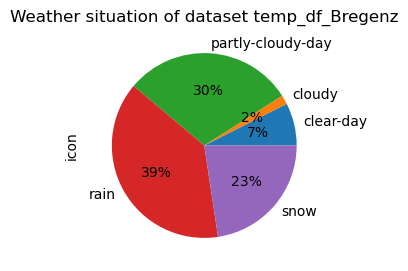

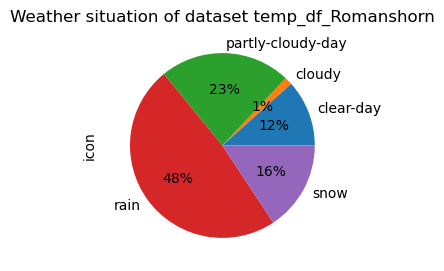

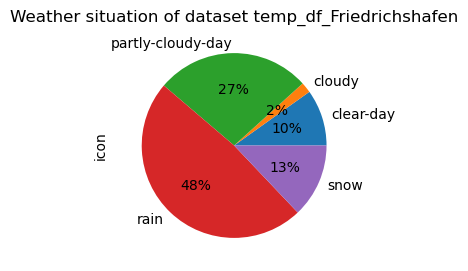

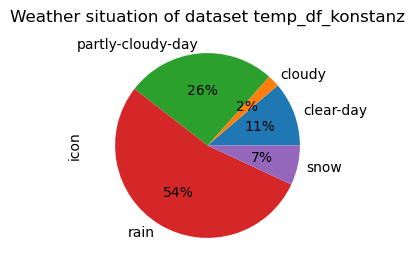

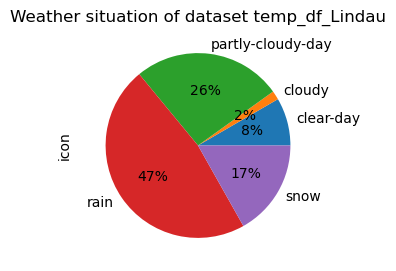

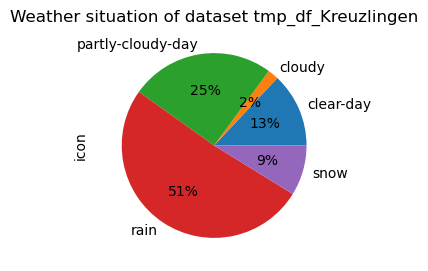

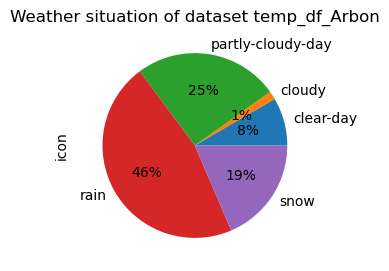

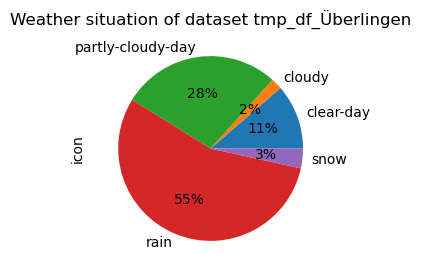

In [170]:
for i in range(len(temp_datasets)):
    plt.figure(figsize=(4,3))
    temp_datasets[i].groupby('icon')['icon'].count().plot(kind='pie', autopct='%.0f%%')
    plt.title(f'Weather situation of dataset {temp_datasets_name[i]}')
    plt.plot()

Understanding of people feeling based of the feellikes feature in different weather situation

In [200]:
df_feellike = df_temp_all[['temp','tempmax','tempmin','feelslike','feelslikemax','feelslikemin','icon']].copy()

In [201]:
df_feellike['diff_min'] = abs(df_feellike['feelslikemin']-df_feellike['tempmin'])
df_feellike['diff_mean'] = abs(df_feellike['feelslike']-df_feellike['temp'])
df_feellike['diff_max'] = abs(df_feellike['feelslikemax']-df_feellike['tempmax'])


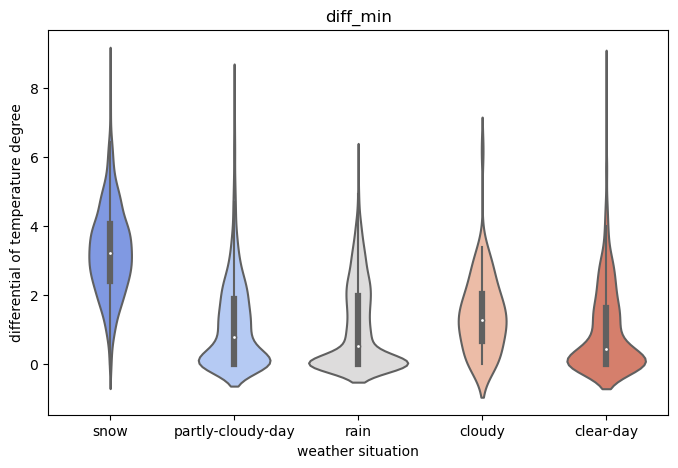

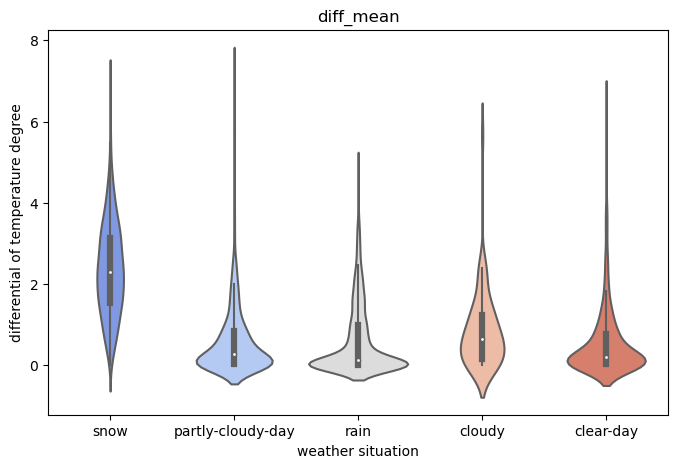

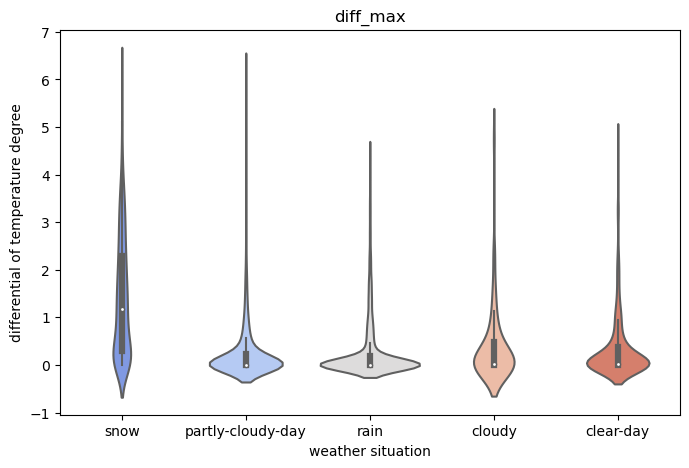

In [202]:
diff_cols = ['diff_min','diff_mean','diff_max']

for item in diff_cols:
  plt.figure(figsize=(8, 5))
  sns.violinplot(x="icon", y=item, data=df_feellike, palette="coolwarm")
  plt.title(item)
  plt.xlabel('weather situation')
  plt.ylabel('differential of temperature degree')
  plt.show()

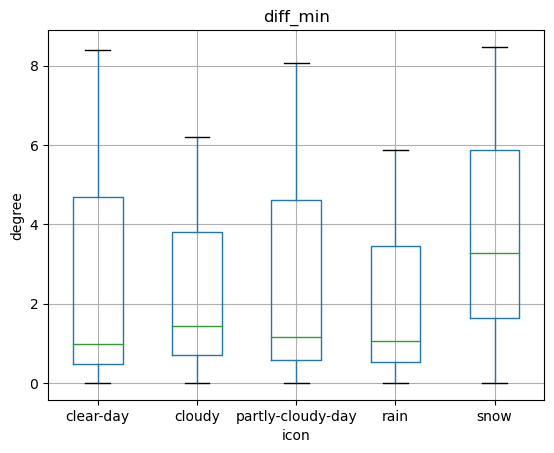

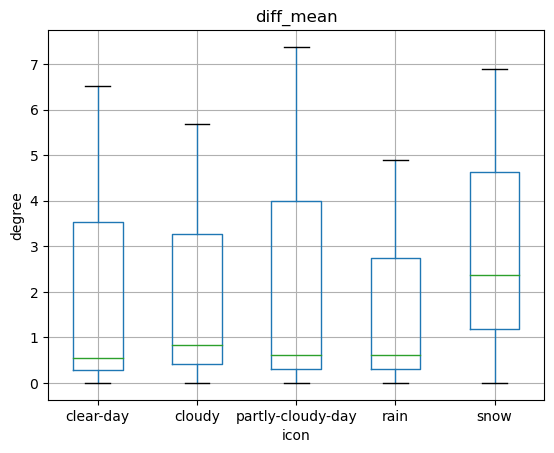

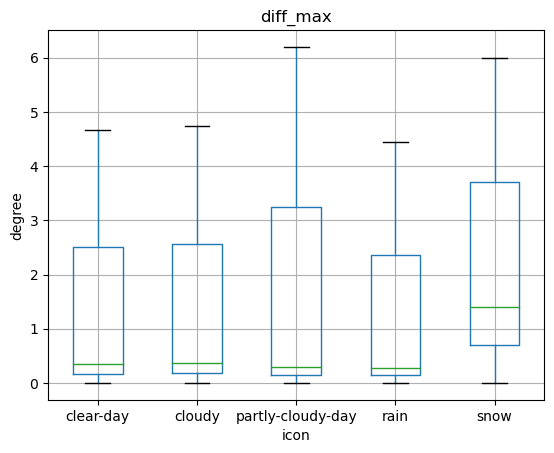

In [203]:
diff_cols = ['diff_min','diff_mean','diff_max']
aggDisct = {}
for item in diff_cols:
  aggDisct = {}
  aggDisct[item] = ['min','mean','max']
  df_feellike.groupby('icon').agg(aggDisct).T.boxplot()
  plt.title(item)
  plt.xlabel('icon')
  plt.ylabel('degree')
  plt.show()

According to above graph the maximum between feellikes and actual temp exist when the weather is partly-cloudy and minimum different exist on cloud days that is intersting finding

- change 'icon' feature to numberic, with replace count of each value
- put the df_temp_all and all emission datasets in same period of time
- merge information to get 

In [204]:
# take backup
df_temp_all_bk = df_temp_all.copy()

In [205]:
dic_replace_icon = dict(df_temp_all.groupby('icon')['icon'].count())

In [206]:
df_temp_all['icon'].replace(dic_replace_icon, inplace = True)

C:\Users\Mehrad Tavanamehr\AppData\Local\Temp\ipykernel_4032\3333818307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_all['icon'].replace(dic_replace_icon, inplace = True)


In [207]:
df_temp_all.head()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon,day_len(permin)
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01,"[Bregenz, Romanshorn, Friedrichshafen, konstan...",3.6625,-0.3125,2.35,3.6625,-5.3250,1.2000,1.8375,96.1875,14.975125,...,265.3875,994.5750,93.8000,8.5250,33.1625,2.8375,1.250,0.52,651,510.375
2010-01-02,"[Bregenz, Romanshorn, Friedrichshafen, konstan...",0.2750,-6.1000,-3.00,-4.1625,-9.9375,-7.2375,-5.9375,80.4750,0.822250,...,253.0000,1017.0000,79.4875,11.3500,42.4375,3.6625,2.000,0.56,651,511.375
2010-01-03,"[Bregenz, Romanshorn, Friedrichshafen, konstan...",-1.4500,-8.1875,-5.80,-1.4500,-13.0500,-8.4250,-10.5500,70.0375,0.000000,...,201.6250,1023.4000,30.8250,29.4000,80.0750,6.9125,3.875,0.59,651,512.375
2010-01-04,"[Bregenz, Romanshorn, Friedrichshafen, konstan...",-3.6875,-8.5000,-6.80,-3.6875,-12.2125,-8.2875,-9.1500,83.8125,0.000000,...,205.9875,1017.1375,34.2875,14.4750,71.1750,6.1375,3.875,0.63,1242,513.500
2010-01-05,"[Bregenz, Romanshorn, Friedrichshafen, konstan...",-4.2500,-7.9125,-5.95,-4.6125,-11.3500,-7.9250,-7.5625,88.6250,0.000000,...,48.0125,1008.2250,61.0625,6.8125,76.8000,6.5375,3.875,0.66,1242,515.125


In [208]:
df_temp_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4807 entries, 2010-01-01 to 2023-02-28
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4807 non-null   object 
 1   tempmax           4807 non-null   float64
 2   tempmin           4807 non-null   float64
 3   temp              4807 non-null   float64
 4   feelslikemax      4807 non-null   float64
 5   feelslikemin      4807 non-null   float64
 6   feelslike         4807 non-null   float64
 7   dew               4807 non-null   float64
 8   humidity          4807 non-null   float64
 9   precip            4807 non-null   float64
 10  precipcover       4807 non-null   float64
 11  snow              4807 non-null   float64
 12  snowdepth         4807 non-null   float64
 13  windgust          4807 non-null   float64
 14  windspeed         4807 non-null   float64
 15  winddir           4807 non-null   float64
 16  sealevelpressure  4807 n

In [209]:
temperature_df = pd.DataFrame()
temperature_df['temp'] = df_temp_all['temp'][(df_temp_all.index >= '2010-01-01')&(df_temp_all.index <= '2022-12-31')].copy()

In [210]:
yearly = pd.DataFrame()
yearly['min'] = temperature_df.resample('A').min()
yearly['mean'] = temperature_df.resample('A').mean()
yearly['max'] = temperature_df.resample('A').max()

In [211]:
def yearly_graph(dataset,feature,resample_method = ['min','mean','max']):
    for item in resample_method:
        change_r = (dataset[item][-1] - dataset[item][0])/len(dataset)
        string_score = f"changing rate: {change_r:.2f}"
        
        fig, ax = plt.subplots(figsize=(6, 2))
        plt.plot(dataset[item])
        ax.plot([dataset.index[0],dataset.index[-1]],[dataset[item][0],dataset[item][-1]], ls="--", c="red")
        plt.text(dataset.index[1], dataset[item][1], string_score)
        plt.title('yearly resampling with method: {0}'.format(item))
        plt.ylabel(feature)
        plt.xlabel('Date')

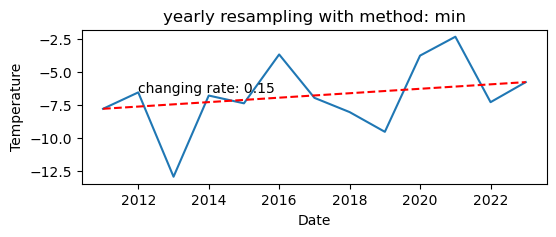

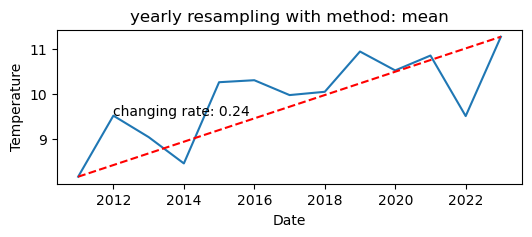

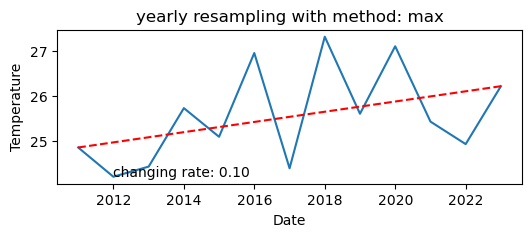

In [212]:
yearly_graph(yearly,'Temperature')

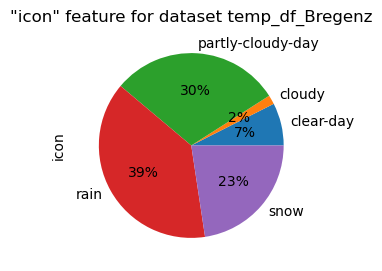

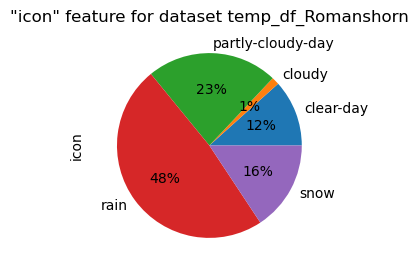

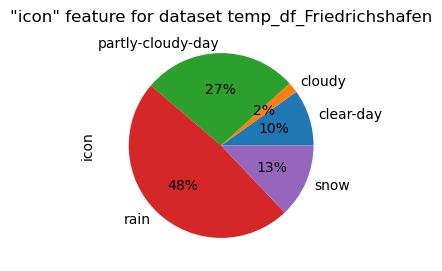

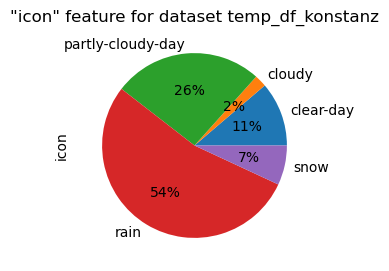

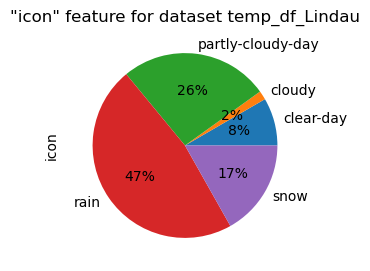

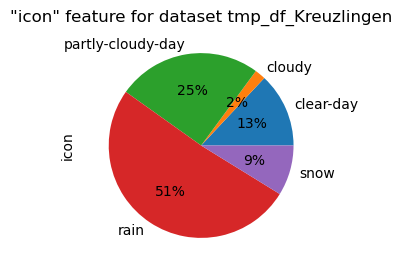

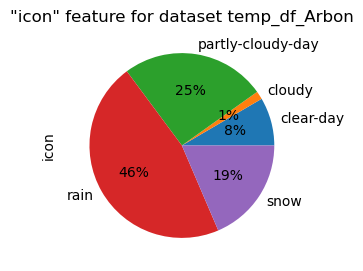

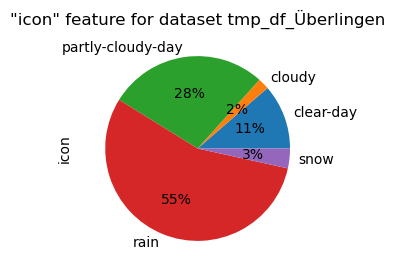

In [213]:
for i in range(len(temp_datasets)):
    plt.figure(figsize=(4,3))
    temp_datasets[i].groupby('icon')['icon'].count().plot(kind='pie', autopct='%.0f%%')
    plt.title(f'"icon" feature for dataset {temp_datasets_name[i]}')
    plt.plot()

In [214]:
# First I need to put all my datasets in correct period and after that continue with null values

N2O_daily_c1 = N2O_daily[(N2O_daily.index >= '2010-01-01')&(N2O_daily.index <= '2021-12-31')].copy()
SF6_daily_c1 = SF6_daily[(SF6_daily.index >= '2010-01-01')&(SF6_daily.index <= '2021-12-31')].copy()
C2O_daily_c1 = C2O_daily[(C2O_daily.index >= '2010-01-01')&(C2O_daily.index <= '2021-12-31')].copy()
CH4_daily_c1 = CH4_daily[(CH4_daily.index >= '2010-01-01')&(CH4_daily.index <= '2021-12-31')].copy()
#####################################33
df_temp_all_c1 = df_temp_all[(df_temp_all.index >= '2010-01-01')&(df_temp_all.index <= '2021-12-31')].copy()

In [215]:
NO2 = N2O_daily_c1['median']
SF6 = SF6_daily_c1['median']
CO2 = C2O_daily_c1['median']
CH4 = CH4_daily_c1['median']

In [216]:
emission_f = [NO2,SF6,CO2,CH4]
emission_f_name = ['NO2','SF6','CO2','CH4']

In [217]:
# add emission datasets
for i in range(len(emission_f)):
    df_temp_all_c1 = df_temp_all_c1.join(emission_f[i], rsuffix=emission_f_name[i])

In [218]:
df_temp_all_c1.rename(columns={'median':'NO2_emit', 'medianSF6':'SF6_emit', 'medianCO2':'CO2_emit', 'medianCH4':'CH4_emit'},
                      inplace=True)

In [219]:
df_temp_all_c1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2010-01-01 to 2021-12-31
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4383 non-null   object 
 1   tempmax           4383 non-null   float64
 2   tempmin           4383 non-null   float64
 3   temp              4383 non-null   float64
 4   feelslikemax      4383 non-null   float64
 5   feelslikemin      4383 non-null   float64
 6   feelslike         4383 non-null   float64
 7   dew               4383 non-null   float64
 8   humidity          4383 non-null   float64
 9   precip            4383 non-null   float64
 10  precipcover       4383 non-null   float64
 11  snow              4383 non-null   float64
 12  snowdepth         4383 non-null   float64
 13  windgust          4383 non-null   float64
 14  windspeed         4383 non-null   float64
 15  winddir           4383 non-null   float64
 16  sealevelpressure  4383 n

In [220]:
emission_df = pd.DataFrame()
emission_df = df_temp_all_c1[['NO2_emit','SF6_emit','CO2_emit','CH4_emit']].copy()

In [221]:
yearl_CO2 = pd.DataFrame()
yearl_CO2['min'] = emission_df.CO2_emit.resample('A').min()
yearl_CO2['mean'] = emission_df.CO2_emit.resample('A').mean()
yearl_CO2['max'] = emission_df.CO2_emit.resample('A').max()

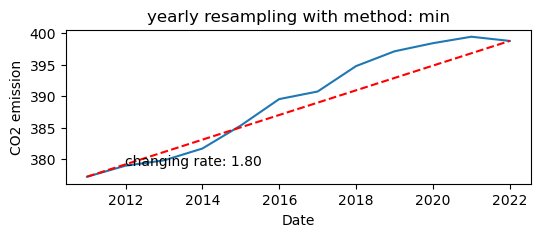

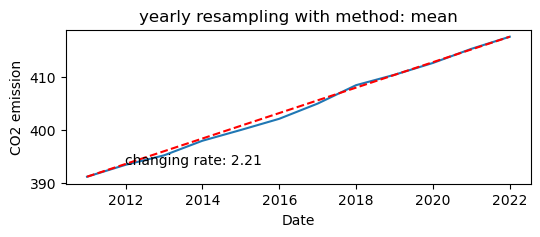

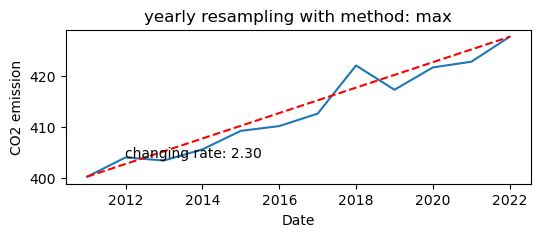

In [222]:
yearly_graph(yearl_CO2,'CO2 emission')

In [223]:
yearl_NO2 = pd.DataFrame()
yearl_NO2['min'] = emission_df.NO2_emit.resample('A').min()
yearl_NO2['mean'] = emission_df.NO2_emit.resample('A').mean()
yearl_NO2['max'] = emission_df.NO2_emit.resample('A').max()

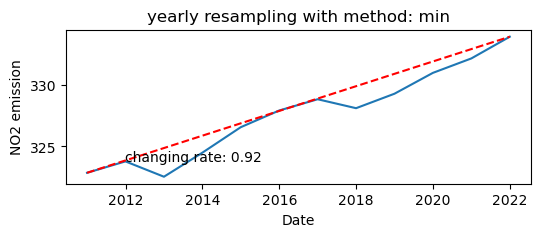

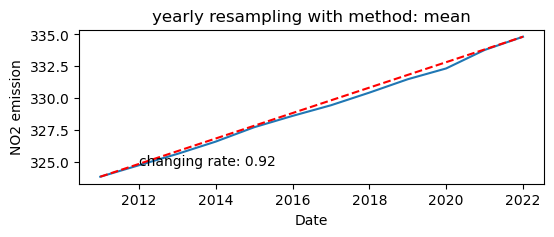

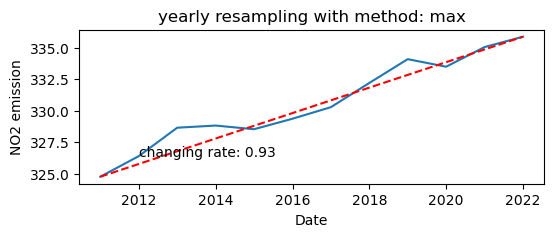

In [224]:
yearly_graph(yearl_NO2,'NO2 emission')

In [225]:
yearl_SF6 = pd.DataFrame()
yearl_SF6['min'] = emission_df.SF6_emit.resample('A').min()
yearl_SF6['mean'] = emission_df.SF6_emit.resample('A').mean()
yearl_SF6['max'] = emission_df.SF6_emit.resample('A').max()

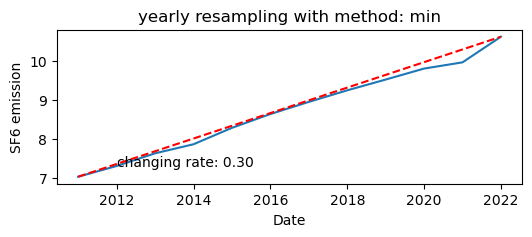

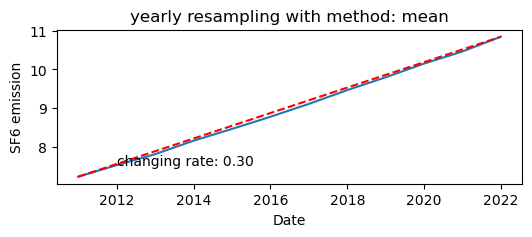

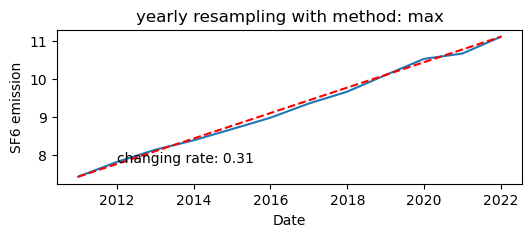

In [226]:
yearly_graph(yearl_SF6,'SF6 emission')

In [227]:
yearl_CH4 = pd.DataFrame()
yearl_CH4['min'] = emission_df.CH4_emit.resample('A').min()
yearl_CH4['mean'] = emission_df.CH4_emit.resample('A').mean()
yearl_CH4['max'] = emission_df.CH4_emit.resample('A').max()

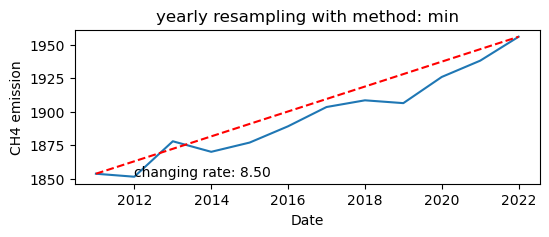

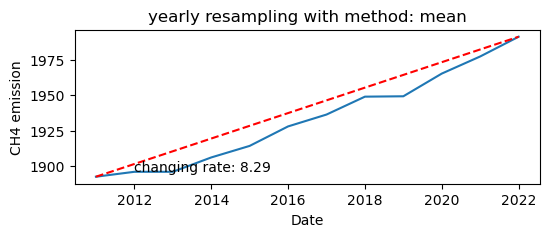

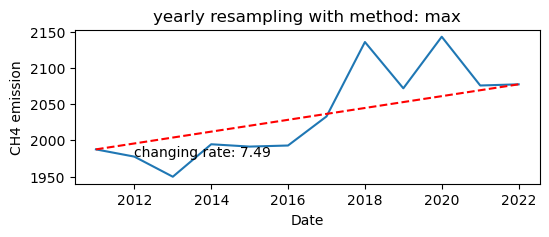

In [228]:
yearly_graph(yearl_CH4,'CH4 emission')

Text(0.5, 1.0, 'Correlation Graph')

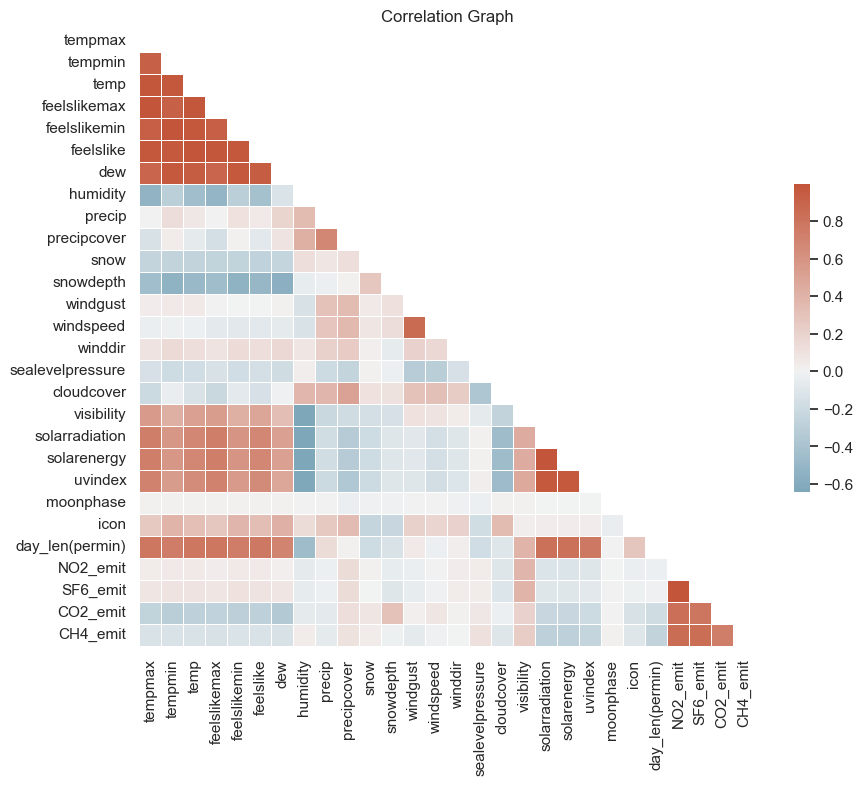

In [230]:
sns.set_theme(style="white")
df_corr = df_temp_all_c1.corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Graph')

- There is too correlate between 'temp', 'tempmin', 'tempmax', 'feellikes', 'feellikesmin', 'feellikesmax', & 'dew' exist and based on our target is 'temp' and this correlation can affet the models I need to drop them.
- Interstingly lenght of day is correlated with temp

In [232]:
df_temp_all_c1.drop(['tempmin', 'tempmax', 'feelslike', 'feelslikemax', 'feelslikemin', 'dew'],axis=1,inplace=True)

Text(0.5, 1.0, 'Correlation Graph')

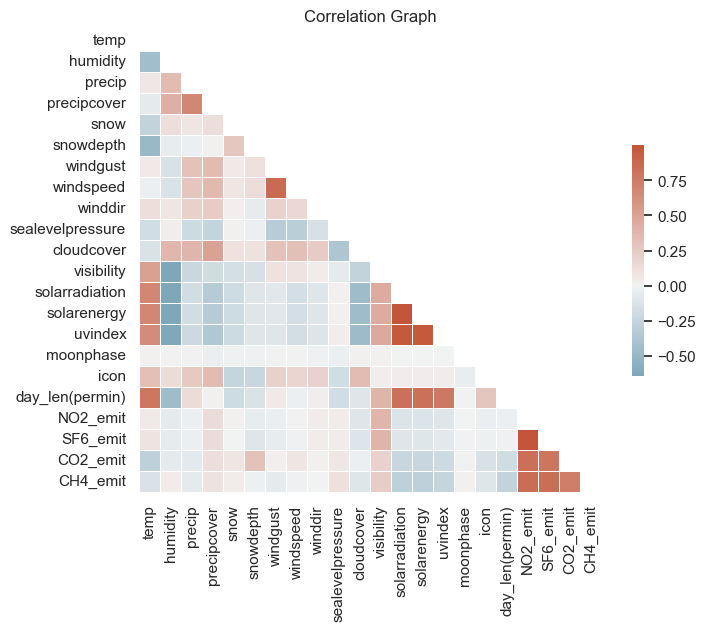

In [233]:
sns.set_theme(style="white")
df_corr = df_temp_all_c1.corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Graph')

In [234]:
emission_df = df_temp_all_c1[['NO2_emit','SF6_emit','CO2_emit','CH4_emit','temp']].copy()

Text(0.5, 1.0, 'Correlation Graph')

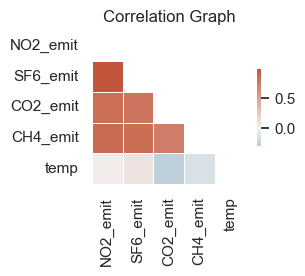

In [236]:
sns.set_theme(style="white")
df_corr = emission_df.corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
f, ax = plt.subplots(figsize=(3, 2))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Graph')

In [237]:
# last job to provide dataset for modeling is drop 'name' column
df_temp_all_c1.drop(['name'],axis=1,inplace=True)

In [238]:
pwd

'E:\\AI_Program\\Course10_project'

In [239]:
df_temp_all_c1.to_csv('data/cleaned_dataset.csv')